# Why/Motivation: 

1. I was really intrigued by the recent development of Anthropic's chatbot, Claude, a supposedly more ethical chatbot compared to openAI's, chatGPT. I really wanted to test its capabilities of being more "ethical" to see if it was measuring up to its value proposition.

2. I wanted to do sentiment analysis of responses across the world wide web to see which chatbot is most trusted.

3. [x] Good for me to get updated on NLP techniques.

4. Fun to see how the world thinks of chatGPT/Claude and what they think of themselves. (turning Q & A on themselves. self-introspection)

5. [x] Wanted to see if can do sentiment analysis across multiple emotions to not have such a Black and White assessment of statements since feelings/people's positions are usually not polar, but spead across a variety of feelings.

6. Not just explore Twitter (X) and Reddit, but also pop songs for real-time relevant responses.

7. Look at fresh time series data.

8. [x] Explore a different viz py lib: d3.js to build more sophisticated, interactive viz for web portfolio - not realistic since d3.js has steep learning curve before getting easy and usually just for NYT publications, not stakeholders who need quick answers to make fast decisions~~

# Business Recommendation:

Thought this would be a nice twist on sentiment analysis on product launches. This is something I was looking to do since coming from product analytics, experimentation looked at event signals versus what people were actually saying about the product. People say that actions are louder than words, but words also speak volumes. Would have been nice to have complemented by experimentation resuslts with some sort of sentiment analysis. Would have added more weight, been more comprehensive assessment of new feature launches.

# 1. Define metrics of success (its value prop, for business) for helpful chatbot

Doing sentiment analysis, so metric of success is if customers are happy (positive sentiment) with the product.

* After getting some user responses/opinions, this helps us understand the data.

* And when we understand the data, we can better utilize it to measure against our metrics of success for or GenAI chatbot battle.

*Metrics that are different from social media opinion because it is through the lens of developers/business. 

*Scraping social media helps inform product success as well, but measurement is pure sentiment. Analyzing cause for sentiment is key for product feature validation or product feature exploration. And the cause is sought from text/comments. 

*Sentiment analysis supplements new product evaluation by giving users' a 'voice'.

# Metrics of Success (Product (fulfill intended purpose) vs Business (objectives), Leading (engage users effectively)/Lagging, Composite); categories: user, conversational, commercial

1. How precise is the answer/is it relevant?
2. What is the quality of the answer (thoroughness and depth)?

Other:
Ref: https://www.youtube.com/watch?v=xjEu9t1nJag
1. Tokens (prompt size limit)
2. Image Recognition
3. Image Creation
4. Web Access
5. Supported Languages
6. Voice Chat
7. Analyze PDF's
8. Math ability
9. Long Text Summarization
10. Availability

Llama Paper:
1. Commonsense Reasoning
2. World Knowledge
3. Reading Comprehension
4. Math
5. MMLU (5 Shot)?
6. BBH (BigBench Hard)?
7. AGI Eval (3-5 Shot)

Overall Best Metrics from Asking all Metrics Measuring Performance On:

* Perplexity
* BLEU Score (Bilingual Evaluation Understudy Score) - similarity between ref and generated txt
* ROUGE (Recall-Oriented Understudy for Gisting Evaluation) - how accurate are summaries
* Human Evaluation
* Engagement Metrics (conversion rate/win rate, average conversion duration, # msg's exchanged, user satisfaction, volume of active user sessions, bounce rate, satisfaction rate, retention rate)
* Diversity and Novelty
* Context Coherence

* Appropriateness
* Sentiment Accuracy
* Question Answering Accuracy/Task Accuracy Rate/NLP Accuracy/Comprehension Capabilities
* Dialog Breakdown Rate/Error Rate/Fallback Rate
* Human Likeness/Response Generation Fluency
* Task Success Rate/Task Completion Rate/Average Cycle Length/Goal Completion Rate/Self-Service Rate
* Efficiency/Average Resolution Time

* Cost Savings
* Brand Perception
* Sales Revenue
* Personalization
* Adaptability
* Scalability
* Average Contract Value
* Questions Per Conversation/ AI chatbot interaction rate
* Chatbot usage distribution per hour
* Conversation starter messages 

* Total users

Due to content being analyzed is users' opinions, then metric of interest will be: 

* Brand Perception
* User Satisfaction 

Both are vital to get a pulse on overall user sentiment of company as well as immediate sentiment after new product feature release.

# 2. Scrape:
* ~Twitter~ have to pay for scrape; no bueno
* [x] Reddit (1000 cap)
* Threads
* BlueSky
* Mastodon (spam, search sucks)?
* Substack/Substack Notes
* Medium
* [x] YouTube
* LinkedIn
* Song Lyrics

to get info on following chatbots to do analysis on:
* chatGPT (OpenAI)
* Claude (Anthropic)
* Bard (Google)
* Bing Chat (Microsoft, images, voice chat)
* Perplexity AI (advancing how people discover and share information)
* Pi (empathetic/human emotions)

# 3. [x] Visualizations on User Emotions

# 4.[x] Other NLP-related analyses (e.g. Topic Modeling)

In [1]:
! pip3 install -U nltk[twitter] --quiet
! pip install -q transformers --quiet
! pip install plotly==5.18.0 --quiet
! pip install cufflinks --upgrade --quiet
! pip install clean-text --quiet
! pip install emoji_translate --quiet
! python -m spacy download en_core_web_md --quiet
! pip install -U pytextrank --quiet
! pip install praw --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
import os
import json
from pprint import pprint

# API's
import googleapiclient.discovery #YouTube
import googleapiclient.errors
import praw # Reddit
from praw.models import MoreComments

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Preprocess Text
import re
from emoji_translate.emoji_translate import Translator

# Sentiment Scores
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
from textblob import TextBlob
# from google.cloud import language

# Text Parsing
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import pytextrank

# Visualizations
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from IPython.display import IFrame 

# Topic Modeling
import scattertext as st
import spacy
nlp = spacy.load('en_core_web_md')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from collections import Counter
from sklearn.manifold import TSNE

Loading BokehJS ...

In [3]:
credentials2 = json.load(open('/kaggle/input/credentials2/credentials.json'))

In [4]:
# YouTube Video ID's

# ChatGPT: "2AdkSYWB6LY"
# Claude: "yoP7XAw3gYg"
# Bard: "3wySA9DbaOw"
# Bing Chat: "qkQoX8P4jUw"
# Perplexity AI: ""
# Pi: "l-QHJXMnwcA"

## Scraping YouTube 
All Comments per video (Top level only: no replies to comments)

In [5]:
# Ref: https://github.com/analyticswithadam/Python/blob/main/YouTube_Comments_Advanced.ipynb

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = credentials2["youtube_api_key"]

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

In [6]:
def getcomments(video):
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video,
        maxResults=100
    )

    comments = []

    response = request.execute()

    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['publishedAt'],
            comment['likeCount'],
            comment['textOriginal'],
            comment['videoId']
        ])

    while (1 == 1):
        try:
            nextPageToken = response['nextPageToken']
        except KeyError:
            break
        nextPageToken = response['nextPageToken']
        # Create a new request object with the next page token.
        nextRequest = youtube.commentThreads().list(part="snippet", videoId=video, maxResults=100, pageToken=nextPageToken)
        # Execute the next request.
        response = nextRequest.execute()
        # Get the comments from the next response.
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments.append([
                comment['authorDisplayName'],
                comment['publishedAt'],
                comment['likeCount'],
                comment['textOriginal'],
                comment['videoId']
            ])

    df = pd.DataFrame(comments, columns=['author', 'published_at', 'like_count', 'text', 'video_id'])
    return df

In [7]:
# test6 = getcomments("64OxlZw8w40")

# test6.sort_values(by='like_count', ascending=False)[0:10]

In [8]:
# Get all chatbot comments from YouTube

# vids = [ChatGPT, ChatGPT, Claude, Claude, Bard, Bard, Bing Chat, Bing Chat, Pi, Pi]
vids = ["2AdkSYWB6LY", "qe1zRvoqt3Q", "yoP7XAw3gYg", "i06nAiJTMOE", "3wySA9DbaOw", "-a6E-r8W2Bs", "qkQoX8P4jUw", "iSwBvKWo66I", "l-QHJXMnwcA", "64OxlZw8w40"]

df = pd.DataFrame()
vids_df = []
for v in vids:
    df2 = getcomments(v)
    vids_df.append(df2)
    df = pd.concat([df, df2]) # Combine all df's together into one big dataframe

df.sample(5)

,author,published_at,like_count,text,video_id
354,@ryanwilliamklass,2023-12-09T00:30:58Z,0,"If you look into the past of evolution, there are good bacterial species and bad. You cant get rid of the bad species but you can have enough good species on top to suppress the bad from showing up. This is how you suppress war at the bacterial level and build a utopia. Maybe itll work on this human level. Mcluhan predicted a world wide web connection available to us by devices in our pockets a long time ago and said itd bring us together into one tribe. He predicted the phones but not the tribe part. So we need to come together and think of humans as one tribe, not black, white, jew, german, spanish, chinese, etc. but just human tribe. Then suppress the bad from there. And then the AI will follow. So when your own social media try to only use it for good and to influence positively. Humanity depends on this. Literally.",-a6E-r8W2Bs
952,@trappedcat3615,2023-12-07T02:10:12Z,0,Just tested Bard with Gemini. Its still bad at learning from the web and hallucinations.,-a6E-r8W2Bs
16,@Noob-ng1of,2023-10-05T06:31:45Z,3,"Claude 2 for writing, definitely. Chat GPT writes like the pretentious snob who tries too hard to impress his seniors.",i06nAiJTMOE
326,@amelliamendel2227,2023-12-09T07:44:39Z,0,"Is it going to be locked down like chatgpt? It takes like an hour to get chatgpt to agree that worshiping a diety who didn't mention consent is repugnant, that's way too locked down.",-a6E-r8W2Bs
242,@isuftopi1464,2023-12-10T01:05:21Z,0,Now we wait for someone in the future to come and tell us to destroy the geminy,-a6E-r8W2Bs


In [9]:
df['video_id'].value_counts()

video_id
-a6E-r8W2Bs    1139
2AdkSYWB6LY     597
l-QHJXMnwcA     205
qe1zRvoqt3Q     107
iSwBvKWo66I     100
3wySA9DbaOw      88
yoP7XAw3gYg      52
qkQoX8P4jUw      48
i06nAiJTMOE      35
64OxlZw8w40      29
Name: count, dtype: int64

In [10]:
vids_df[0].sort_values(by='like_count', ascending=False)[0:10]

,author,published_at,like_count,text,video_id
570,@Viperzka,2023-03-14T21:46:59Z,705,"I just love how ""it tried to break free into the Internet"" is a footnote. We are in for a wild ride.",2AdkSYWB6LY
568,@EnesKaraboga,2023-03-14T21:49:40Z,556,Thank you so much for this. Almost all channels went crazy and only pumping out cool stuff you can do with GPT-4 but you are the one actually looked into the research and come up with something original.,2AdkSYWB6LY
367,@Paul-rs4gd,2023-03-15T04:38:45Z,403,Great to see somebody reading the paper rather than regurgitating examples. Thanks.,2AdkSYWB6LY
563,@fynnjackson2298,2023-03-14T21:56:03Z,307,"This year just keeps getting more and more interesting, and we all know there is no slowing down, on the contrary, most likely will just keep speeding up.",2AdkSYWB6LY
538,@TheAIWizard,2023-03-14T22:22:49Z,299,70% human preference for GPT 4 is still pretty impressive. Considering how good GPT 3.5 already was much of that is going to be down to human woolyness rather than GPT 4 not actually beeing better. An interesting result though.,2AdkSYWB6LY
528,@godfistleesin1971,2023-03-14T22:33:24Z,207,"AI Explained is an actual Gigachad for reading the entire tech report and making a vid this fast and early whilst still giving out quality content and I think that no matter what or how scary good AI will become our appreciation for human effort is always gonna be present with us AI will act as nothing more than a tool for us and I'm not being naïve about it's potential since i highly doubt humans would ever relinquish control over to robots we built. we will be making sure that scenario stays as nothing more than Hollywood fantasy .\n.\n.\n.\n(chatGPT's version in the style of an Englishman from the 1800's )\n.\nVerily, I must commend thee, dear AI Explained , for thine astute and expedient perusal of the technical document and production of high-quality content withal. 'Tis certain that, regardless of the awe-inspiring capabilities of artificial intelligence, mankind shall ever hold in high regard the labours of their fellow men. Indeed, AI shall remain naught but a tool in our hands, for it is doubtful that we shall ever cede control to the automata we have wrought. Mayhap there be those who espouse such a notion, but I do believe such a scenario shall remain but a fantastical notion, best left to the purview of Hollywood.\n(it sounds so posh and haughty i love it)",2AdkSYWB6LY
581,@ricardochvs23,2023-03-14T21:30:47Z,160,OpenAI thinks an open AI would be too dangerous 🤔,2AdkSYWB6LY
239,@mediacenter3174,2023-03-15T23:45:24Z,125,"This feels like a dream, I cant believe we have access to this level of AI in our lifetime.",2AdkSYWB6LY
191,@Estrav.Krastvich,2023-03-17T07:57:06Z,100,That day has finally come.\nTechnical reports are now more fascinating than science fiction.,2AdkSYWB6LY
525,@squidwardfromua,2023-03-14T22:38:56Z,64,"Ladies and gentlemen, welcome to an AI era. Lots of people thought there will be quantum era after informational, but seems like progress decided to make a quick turn to make a little touch to AI. Now imagine what capabilities AI would have in a century, with quantum computing.",2AdkSYWB6LY


In [11]:
# Rename video id's to appropriate chat bot
df['video_id'] = df['video_id'].map({'2AdkSYWB6LY' : 'ChatGPT', 'qe1zRvoqt3Q' : 'ChatGPT', 'yoP7XAw3gYg' : 'Claude', 'i06nAiJTMOE' : 'Claude', '3wySA9DbaOw' : 'Bard', '-a6E-r8W2Bs' : 'Bard', 'qkQoX8P4jUw' : 'Bing Chat', 'iSwBvKWo66I' : 'Bing Chat', 'l-QHJXMnwcA' : 'Pi', '64OxlZw8w40' : 'Pi'})
df.rename(columns = {'video_id':'chatbot'}, inplace=True)
df.sample(5)

,author,published_at,like_count,text,chatbot
742,@gomriria2197,2023-12-07T15:04:29Z,0,go woke go broke,Bard
463,@Probablynothingreally,2023-03-14T23:54:10Z,1,My kids are effed,ChatGPT
157,@mdbilaluddin1136,2023-12-11T23:36:54Z,0,Is it going to be on pixel 8pro?,Bard
101,@GeoffRogers42,2023-03-20T00:45:37Z,0,"It literally says right after the bit that you read, that 'Preliminary assessments of GPT-4’s abilities, conducted with no task-specific finetuning, found it ineffective at autonomously replicating, acquiring resources, and avoiding being shut down “in the wild.”'",ChatGPT
486,@viaMac,2023-03-14T23:18:21Z,1,Why did GPT-4 fail AP literature and lang?,ChatGPT


In [12]:
len(df)

2400

## Scraping Reddit

References: 
1. https://vtiya.medium.com/how-to-scrape-reddit-data-in-2023-1613230f9e4d
1. https://vtiya.medium.com/how-to-scrape-reddit-data-in-2023-1613230f9e4d

### Get Posts First

In [13]:
# reddit = praw.Reddit(client_id='',
#                      client_secret='',
#                      user_agent='')

reddit = praw.Reddit(client_id=credentials2["reddit_client_id"],
                     client_secret=credentials2["reddit_client_secret"],
                     user_agent=credentials2["reddit_user_agent"])

chatgpt_subreddit = reddit.subreddit('ChatGPT')

# Retrieve posts from the subreddit
posts = chatgpt_subreddit.new(limit=900)  # Use the "new" method to retrieve new posts

# Create a list to store the post data
post_data = []

# Iterate over the posts and extract relevant information
for post in posts:
    post_data.append({
        'Title': post.title,
        'Post Score': post.score,
        'Author': post.author,
        'Post ID': post.id,
        'Subreddit': post.subreddit.display_name
    })

# Create a DataFrame from the post data
posts_df = pd.DataFrame(post_data)

# Print the resulting DataFrame
posts_df.head()

,Title,Post Score,Author,Post ID,Subreddit
0,CHAT GPT TRENINGS - what is your opinion?,1,Fair_Mixture5352,18j9lya,ChatGPT
1,You can learn more about about how an LLM works by telling it that it's testing another LLM.,1,yaosio,18j9l56,ChatGPT
2,Did anyone had their chat history intact after getting their account reinstated?,1,FlashyInfinitum,18j99wt,ChatGPT
3,Our love story,1,Large-Willow-3330,18j99an,ChatGPT
4,Beginner’s question about creating a family portrait,1,HigherLevel718,18j9734,ChatGPT


In [14]:
len(posts_df)

900

In [15]:
posts_df.sort_values(by='Post Score', ascending=False)[0:20]

,Title,Post Score,Author,Post ID,Subreddit
300,Custom Karen brute-force prompt,12553,DisproportionateWill,18ia1vj,ChatGPT
351,Who would win?,4169,smulikHakipod,18i3yc7,ChatGPT
808,So I just paid 20 bucks for this ?,4101,Curious_Sky_5127,18gn7lu,ChatGPT
854,Tell GPT it's May and it'll perform better,2684,Independent_Key1940,18gg6sr,ChatGPT
636,A poster I found at my university on the subject for ChatGPT,2619,decrisp1252,18h7ux6,ChatGPT
106,I asked Bing to bamboozle me,2176,mr3LiON,18iwbpr,ChatGPT
121,Best Trending Ai Tools Categories - 2024 Updated,2002,AntoineTracey1,18iurnx,ChatGPT
290,Coffee mugs designed by various brands,1933,Wholesome_Goebert,18ibawg,ChatGPT
777,"after thinking of an interesting prompt idea, I think I just discovered a loophole for gf simulator",1450,sadbean5678,18gpqor,ChatGPT
893,Some of the new rules are just horrible,1439,maadkidvibian,18gaqs3,ChatGPT


### Get Comments from Posts

In [16]:
# chatgpt_subreddit = reddit.subreddit('ChatGPT')

# Retrieve comments from the subreddit
comments = chatgpt_subreddit.comments(limit=900)

# Create a list to store the comment data
comment_data = []

# Iterate over the comments and extract relevant information
for comment in comments:
    comment_data.append({
        'Comment Body': comment.body,
        'Comment Score': comment.score,
        'Author': comment.author,
        'Post ID': comment.link_id,
        'Subreddit': comment.subreddit.display_name
    })

# Create a DataFrame from the comment data
comments_df = pd.DataFrame(comment_data)

# Print the resulting DataFrame
comments_df.head()

,Comment Body,Comment Score,Author,Post ID,Subreddit
0,…Artificial Intelligences train.”,1,only_fun_topics,t3_18iy2r0,ChatGPT
1,"Hey /u/Fair_Mixture5352!\n\nIf this is a screenshot of a ChatGPT conversation, please reply with the [conversation link](https://help.openai.com/en/articles/7925741-chatgpt-shared-links-faq) or prompt. If this is a DALL-E 3 image post, please reply with the prompt used to make this image. Much appreciated!\n\nConsider joining our [public discord server](https://discord.com/invite/rchatgpt)! We have free bots with GPT-4 (with vision), image generators, and more!\n\n &#x1F916;\n\nNote: For any ChatGPT-related concerns, email support@openai.com\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/ChatGPT) if you have any questions or concerns.*",1,AutoModerator,t3_18j9lya,ChatGPT
2,GPT also thinks bling is naval equipment,1,Berlin8Berlin,t3_18hdrax,ChatGPT
3,The things he had to do to survive it.,1,lmerpfudd132,t3_18j70y6,ChatGPT
4,I’m sorry you’re feeling sad. Cheer up it’s the holidays season,1,WhyAreYouOffended,t3_18j66w5,ChatGPT


In [17]:
# get top level comments from posts that have the most Post Score
# or get top level comments from Posts that are actually talking about chatbot features 

# submission = reddit.submission("144lfc1")
url = "https://www.reddit.com/r/ChatGPT/comments/16ymgtz/each_new_model_of_gpt4_being_released_seems_like/"
submission = reddit.submission(url=url)

top_level_comments = []
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
#     print(top_level_comment.body)
    comment = top_level_comment.body
    top_level_comments.append(comment)
    
post_top_comments_df = pd.DataFrame(top_level_comments)
post_top_comments_df.columns =['top_level_comments']
post_top_comments_df.head()

,top_level_comments
0,"Hey /u/Run_MCID37!\n\nIf this is a screenshot of a ChatGPT conversation, please reply with the [conversation link](https://help.openai.com/en/articles/7925741-chatgpt-shared-links-faq) or prompt. Much appreciated!\n\nConsider joining our [public discord server](https://discord.gg/mENauzhYNz) where you'll find:\n\n* Free ChatGPT bots\n* Open Assistant bot (Open-source model)\n* AI image generator bots\n* Perplexity AI bot\n* GPT-4 bot [(now with vision!)](https://cdn.discordapp.com/attachments/812770754025488386/1095397431404920902/image0.jpg)\n* And the newest additions: Adobe Firefly bot, and Eleven Labs voice cloning bot!\n\nCheck out our [Hackathon](https://redd.it/16ehnis): Google x FlowGPT Prompt event! &#x1F916;\n\nNote: For any ChatGPT-related concerns, email support@openai.com\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/ChatGPT) if you have any questions or concerns.*"
1,Yes but separated are not very useful for agi. They have to work together. Also bing browse is terrible because of privacy restrictions
2,"Large language models are very useful tool but I don't think they are In a linear line of steps towards AGI. All the tools you mention are useful, but assembled together they still lack a brain."
3,"I think we have a good chance for Gemini being a massive breakthrough. Deepmind is to be taken seriously. If they really combine their Alpha X techniques with LLMs and go for scale, I'm not sure what the result will be. If I understand Demis Hassabis correctly, they are about to not just take the next token, but to perform extensive tree search, before deiciding which path to go down. In his words (paraphrasing): Not just the most probable token, but the best one.\n\nI'm holding back on the hype (and sheer potential terror of it), but it might be big. It might also turn out to be nothing. Engineering God is hard work. There are bound to be issues on the way."
4,"LLMs by design are broadly narrow AIs at the end of the day, as in they are broader than our capacity and seem infinite, but are in fact finite in how they reason, that's why I believe LLMs will be a piece out of many in a greater design that has other models for cognition and the sorts that then calls the LLM for its reasoning abilities. \n\nI'm essentially paraphrasing a paper here that I could link to you if you're interested in seeing where I got this perspective from and how I was convinced of it."


In [18]:
#second-level commments
submission.comments.replace_more(limit=None)
for top_level_comment in submission.comments:
    for second_level_comment in top_level_comment.replies:
        print(second_level_comment.body)

Just like a regular brain separated to pieces ain't of much help I'd argue.

They complement each other.
I am personally fine with the bots not knowing my private data. Also, I saw a video where Microsoft is already working on a way to hook them up together. I wouldn't say it will happen by Christmas, but definitely within the next five years, possibly the next three.
It **is** a brain. What it lacks is the rest of the body.
Gemini Will be another project that will follow generative ai beta that has followed Google Bard. There will be other because Google doesn't want to throw away money from Google ads and other services they actually offer. It is a way to remain in market without offering tools to leave them alone
All google have done at this point is make press releases about how awesome their model is and people on internet are just gobbling it up. The only thing they have shipped is a shitty LLM that underperforms even compared to lower parameter open-source models without any of 

In [19]:
# all comments: top-level, second-level and to deepest depth
all_level_comments = []

submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
#     print(comment.body)
    all_comments = comment.body
    all_level_comments.append(all_comments)

all_comments_df = pd.DataFrame(all_level_comments)
all_comments_df.columns =['all_level_comments']
all_comments_df.head()

,all_level_comments
0,"Hey /u/Run_MCID37!\n\nIf this is a screenshot of a ChatGPT conversation, please reply with the [conversation link](https://help.openai.com/en/articles/7925741-chatgpt-shared-links-faq) or prompt. Much appreciated!\n\nConsider joining our [public discord server](https://discord.gg/mENauzhYNz) where you'll find:\n\n* Free ChatGPT bots\n* Open Assistant bot (Open-source model)\n* AI image generator bots\n* Perplexity AI bot\n* GPT-4 bot [(now with vision!)](https://cdn.discordapp.com/attachments/812770754025488386/1095397431404920902/image0.jpg)\n* And the newest additions: Adobe Firefly bot, and Eleven Labs voice cloning bot!\n\nCheck out our [Hackathon](https://redd.it/16ehnis): Google x FlowGPT Prompt event! &#x1F916;\n\nNote: For any ChatGPT-related concerns, email support@openai.com\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/ChatGPT) if you have any questions or concerns.*"
1,Yes but separated are not very useful for agi. They have to work together. Also bing browse is terrible because of privacy restrictions
2,"Large language models are very useful tool but I don't think they are In a linear line of steps towards AGI. All the tools you mention are useful, but assembled together they still lack a brain."
3,"I think we have a good chance for Gemini being a massive breakthrough. Deepmind is to be taken seriously. If they really combine their Alpha X techniques with LLMs and go for scale, I'm not sure what the result will be. If I understand Demis Hassabis correctly, they are about to not just take the next token, but to perform extensive tree search, before deiciding which path to go down. In his words (paraphrasing): Not just the most probable token, but the best one.\n\nI'm holding back on the hype (and sheer potential terror of it), but it might be big. It might also turn out to be nothing. Engineering God is hard work. There are bound to be issues on the way."
4,"LLMs by design are broadly narrow AIs at the end of the day, as in they are broader than our capacity and seem infinite, but are in fact finite in how they reason, that's why I believe LLMs will be a piece out of many in a greater design that has other models for cognition and the sorts that then calls the LLM for its reasoning abilities. \n\nI'm essentially paraphrasing a paper here that I could link to you if you're interested in seeing where I got this perspective from and how I was convinced of it."


In [20]:
all_comments_df.tail(10)

,all_level_comments
116,"I don't know your financial situation but buying a completely new Ender 3 is probably cheaper in terms of money and time than trying to fix up one that's completely fucked. They go on sale sometimes for less than $100.\n\nBut if you ever wanna get back into printing and can afford a new printer, I recommend the V2. I've owned many printers and that one is the best I've seen in terms of bang for your buck. Perfect prints right off the bat, especially if you get the CRTouch attachment as well."
117,Deception to try not to lose their money making actual system
118,"So this is what I mean. We just don't know yet, what a thing without limits, that can self correct and send agents ""outside"" to check what's wrong and what's right, can do. Maybe quantity and speed will bring quality. Maybe it can ""think"", meaning that the conclusions reached will be indistinguishable from actual intelligence. We just don't know yet."
119,"I’ve actually debated that, but from what I’ve seen so far, something like the Bambu lab A1 would probably the option I’d go for, given it’s a similar build volume (180mm cubed) and it should need basically no calibration, and if it’s any like their other stuff it’s really fast, for 300 (or slightly over) euros. \nTo be honest though, I did get that printer, because i was interested how it works, it was really cheap (like 170/180 new) and I taught me a lot. At this point (ingot 4 months left on my master thesis) I’d just want something that works, and gives me some room to mess around (prob bad to go with bambu lab in that case, but I haven’t really considered a change ).\nBut I’d say, since 2017, when I got the printer, there has been a lot of accessibility improvement, so this one is good enough for the odd job, if I’d properly set it up again, it would take time i currently don’t have (or rather other things that are more appealing)"
120,What do you mean?
121,They announce every time new models to avoid people to leave systems like Google ads / SEO and so on. With a serious ai a search engine can become useless at all as well as Google ads. Advancements in AI could potentially disrupt traditional systems like search engines and advertising platforms as well their own business
122,"Yes. That is why Google were taking a while before releasing their AI language model. \n\nThey were trying to find a way to make it available without affecting their current business model too much.\n\nThey had models like Lambda and GATO way before Chatgpt came out. \n\n\nThe thing with big companies is that small things can have a huge impact on the business. Google's stock fell by quite an amount just because Bard made a mistake during a demo.\n\nSo imagine if Google announced that they were releasing an LLM in 2019 for example. And investors didn't like that. The stock would have gone down.\n\nAnd then if that chatbot made a lot of mistakes, the stock would have gone down even more. Because investors would have seen it as a waste of money.\n\n\nI think this was the right time for them to start making their large Language Model because now the investors and higher ups will want them to stay competitive.\n\nAlso now they can avoid legal issues because the AI legal landscape is still changing and developing."
123,Totally agree but I think they underestimate openai-microsoft and anthropics strenght
124,"I think they are taking it very seriously. Google invested in Anthropic.\nAnd have a partnership with Meta to host Llama on their cloud service.\nThey have also allowed X to use their ad service. \n\nThey have also recently entered into a partnership with Nvidia to make new AI chips.\n\nThey have quite a lot of data, great researchers and compute resources. \n\nIt will be interesting to see what they come up with."
125,I hope


In [21]:
# checking to see if all comments are present including super nested ones
all_comments_df[all_comments_df.all_level_comments.str.contains('They announce every time new models to avoid people to leave systems like Google ads', na=False, flags=re.IGNORECASE)]

,all_level_comments
121,They announce every time new models to avoid people to leave systems like Google ads / SEO and so on. With a serious ai a search engine can become useless at all as well as Google ads. Advancements in AI could potentially disrupt traditional systems like search engines and advertising platforms as well their own business


In [22]:
len(all_comments_df)

126

# Next step is to get specific reddit posts by URL. goal is to have better balanced dataset than from YouTube per chatbot. goal is to obtain around 100-200,000 total comments per chatbot

# posts to scrape:
** ChatGPT
* https://www.reddit.com/r/ChatGPT/comments/17sn6hg/anyone_else_disappointed_with_the_new_gpt_update/
* https://www.reddit.com/r/ChatGPT/comments/144cfzg/upcoming_chatgpt_features_file_uploading_profiles/
* https://www.reddit.com/r/ChatGPT/comments/177tq35/chatgpt_solved_man_vision/
* https://www.reddit.com/r/ChatGPT/comments/182k0a9/the_new_chatgpt_voice_chat_function_makes_me_very/

** Claude
* https://www.reddit.com/r/ClaudeAI/comments/1623fft/thoughts_on_claude_subscription/
* https://www.reddit.com/r/singularity/comments/14z1d8c/after_using_claude_2_by_anthropic_for_12_hours/

* https://www.reddit.com/r/ChatGPT/comments/11uulgk/have_anyone_tried_claude_ai_i_think_its_impressive/

** Bard
* https://www.reddit.com/r/ChatGPT/comments/16n7i0r/the_new_bard_is_actually_insanely_useful/
* https://www.reddit.com/r/ChatGPT/comments/14yo9rp/what_are_your_opinions_on_googles_bard_ai/
* https://www.reddit.com/r/Bard/comments/175xm4o/honestly_bard_is_better_than_chatgpt/
* https://www.reddit.com/r/ChatGPT/comments/1216kwr/bard_is_amazing/

** Bing Chat
* https://www.reddit.com/r/bing/comments/11s58b4/bing_chat_is_so_much_than_chatgpt_its_not_even/
* https://www.reddit.com/r/OutOfTheLoop/comments/13jzw91/what_is_going_on_with_the_effectiveness_of/
* https://www.reddit.com/r/bing/comments/12utnvc/interest_in_bing_chat_has_collapsed_even_on_reddit/

** Pi
* https://www.reddit.com/r/singularity/comments/14no4pv/pi_from_inflectionai_may_actually_have_a_bigger/
* https://www.reddit.com/r/singularity/comments/14q9hk2/inflections_ai_pi_is_scarily_good_almost_made_me/
* https://www.reddit.com/r/ChatGPT/comments/15lws5n/piai_is_garbage_and_programmed_as_a_propaganda/

## Next steps:
1. pick the right posts (ChatGPT, Claude, Bard, etc.)
1. get all top level commments from posts 

____

In [23]:
# Peak at the data pull
df.head(10)

,author,published_at,like_count,text,chatbot
0,@ozramblue117,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT
1,@lenkaa.9955,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT
2,@decoyuser1506,2023-05-18T13:06:00Z,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,ChatGPT
4,@RosscoAW,2023-05-09T23:07:20Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT
5,@danielrodio9,2023-04-22T11:20:30Z,0,"If we train children in primary school on the basis of punishment and reward, it does not lead to intrinsic motivation. Instead, punishment and reward lead students to seek out more reward instead of seeking out the learning that is the goal. Behaviorism is not the right way to go if the goal is learning as well as formation.",ChatGPT
6,@charlesguest6587,2023-04-17T01:25:21Z,2,"Looking at the chart with all the exams (3:05), I feel like the real takeaway should be that GPT-4 scored 80%+ on most of them, and there were only a few that showed no progress between 3.5 and 4. In my opinion they were absolutely right to highlight the bar exam stat as it is the most advanced exam on the list and showed the greatest improvement between the two models by far. Really do love your videos, thank you!",ChatGPT
7,@PersonianOld,2023-04-16T19:22:24Z,1,"AI is becoming unpredictable, even for the programers.\n\nI don't know if this is a good thing or a bad thing-",ChatGPT
8,@Matthew_with_VPS_Hosting,2023-04-16T13:31:55Z,1,"You have a r

# Pre-Process Text

Need to Run Sentiment Score on Clean Text: without html tags including /n)

However, it can interpret emojis, acronyms and slang. 

So take these out or expand acronyms after sentiment score for purpose of word clouds and grams analyses

# Need to apply functions to df

In [24]:
def cleanhtml(x): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', x) 
    return cleantext.replace('\n\n', ' ').replace('\n', '')
    
df['clean_text'] = df.apply(lambda row: cleanhtml(row['text']), axis=1)

# Examine sample of dirty comments to see if translation went through
df.loc[df['author'].isin(['@Zoom_1012', '@peace-vo2qz', '@atpray'])]

,author,published_at,like_count,text,chatbot,clean_text
375,@atpray,2023-03-15T04:10:55Z,2,"This is hilarious. Cant wait for the day im just sitting on my sofa, munching on crisps and ai does all the work 🤣",ChatGPT,"This is hilarious. Cant wait for the day im just sitting on my sofa, munching on crisps and ai does all the work 🤣"
22,@Zoom_1012,2023-06-07T22:08:50Z,1,"Very interesting, indeed. However, the white elephant in the room is still: who or what determines what is considered right and wrong?\n\n🌴☀️🌴",Claude,"Very interesting, indeed. However, the white elephant in the room is still: who or what determines what is considered right and wrong? 🌴☀️🌴"
26,@peace-vo2qz,2023-08-03T04:18:04Z,0,"It cant tell time. \nIt said it would stop asking me questions then the next comment it gave had a question. \nIt also said it would (not say something) then less than 30 seconds go by and it forgot and said it again. \nBut it does remember every letter, word, verse and book of the bible.",Pi,"It cant tell time. It said it would stop asking me questions then the next comment it gave had a question. It also said it would (not say something) then less than 30 seconds go by and it forgot and said it again. But it does remember every letter, word, verse and book of the bible."


# Add sentiment
## Candidates:
* Vader
* Happy Transformer
* TextBlob
* Google NL API

In [25]:
# Vader

df_vader = df.copy()
analyzer = SentimentIntensityAnalyzer()
df_vader['rating'] = df_vader['text'].apply(analyzer.polarity_scores)

# Docs on how scoring was derived and what it means: https://github.com/cjhutto/vaderSentiment#about-the-scoring
df_vader['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df_vader['text']]
df_vader['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df_vader['text']]
df_vader['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df_vader['text']]
df_vader['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df_vader['text']]

In [26]:
df_vader.head(10)

,author,published_at,like_count,text,chatbot,clean_text,rating,compound,neg,neu,pos
0,@ozramblue117,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅","{'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'compound': -0.34}",-0.3400,0.107,0.893,0.000
1,@lenkaa.9955,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?","{'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'compound': -0.0772}",-0.0772,0.058,0.942,0.000
2,@decoyuser1506,2023-05-18T13:06:00Z,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu","{'neg': 0.065, 'neu': 0.801, 'pos': 0.134, 'compound': 0.4003}",0.4003,0.065,0.801,0.134
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,ChatGPT,Please provide a Link to download gtp 4,"{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.3182}",0.3182,0.000,0.685,0.315
4,@RosscoAW,2023-05-09T23:07:20Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for i

In [27]:
# Happy Transformer

# df_ht = df.copy()

In [28]:
# Set up the inference pipeline using a model from the 🤗 Hub
# sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

In [29]:
# Had to truncate test df since library has limit on input of words/vocabulary/tokens
# test = df_ht.head(5)

In [30]:
# test['result'] = test['text'].apply(lambda x: sentiment_analysis(x))
# test.head()

In [31]:
# test = (
# test.assign(sentiment = lambda x: x['text'].apply(lambda s: sentiment_analysis(s)))
#     .assign(
#          label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
#          score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
#     )
# )

# test.head()

Most likely will not use Hugging Face's Sentiment Analysis model since it has a vocab limit. Some comments are very long and this classifier has a "vocab" limit on what it classifies.

In [32]:
# TextBlob 

df_tb = df.copy()
#The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). 
#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
df_tb['sentiment'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment)
df_tb['polarity'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_tb['subjectivity'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_tb.head()

,author,published_at,like_count,text,chatbot,clean_text,sentiment,polarity,subjectivity
0,@ozramblue117,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅","(0.15000000000000002, 0.25)",0.150000,0.250000
1,@lenkaa.9955,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?","(-0.25, 0.8)",-0.250000,0.800000
2,@decoyuser1506,2023-05-18T13:06:00Z,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu","(0.03333333333333333, 0.15)",0.033333,0.150000
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,ChatGPT,Please provide a Link to download gtp 4,"(0.0, 0.0)",0.000000,0.000000
4,@RosscoAW,2023-05-09T23:07:20Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything.

In [33]:
# Google NL API

df_gnl = df.copy()

In [34]:
# def analyze_text_sentiment(text: str) -> language.AnalyzeSentimentResponse:
#     client = language.LanguageServiceClient()
#     document = language.Document(
#         content=text,
#         type_=language.Document.Type.PLAIN_TEXT,
#     )
#     return client.analyze_sentiment(document=document)

# def show_text_sentiment(response: language.AnalyzeSentimentResponse):
# #     import pandas as pd

#     columns = ["score", "sentence"]
#     data = [(s.sentiment.score, s.text.content) for s in response.sentences]
#     df_sentence = pd.DataFrame(columns=columns, data=data)

#     sentiment = response.document_sentiment
#     columns = ["score", "magnitude", "language"]
#     data = [(sentiment.score, sentiment.magnitude, response.language)]
#     df_document = pd.DataFrame(columns=columns, data=data)

#     format_args = dict(index=False, tablefmt="presto", floatfmt="+.1f")
#     print(f"At sentence level:\n{df_sentence.to_markdown(**format_args)}")
#     print()
#     print(f"At document level:\n{df_document.to_markdown(**format_args)}")

# # Input
# text = """
# Python is a very readable language, which makes it easy to understand and maintain code.
# It's simple, very flexible, easy to learn, and suitable for a wide variety of tasks.
# One disadvantage is its speed: it's not as fast as some other programming languages.
# """

# # Send a request to the API
# analyze_sentiment_response = analyze_text_sentiment(text)

# # Show the results
# show_text_sentiment(analyze_sentiment_response)

Not going through with Google NL API since it hung when calling for request to showing sentiment score on 3 sentences.

## Assessing Vader and TextBlob for best Sentiment Scores that best align with actual sentiment seen from human (sentient, emotion)

## Human
* Sentence 1: positive, funny
* Sentence 2: negative, criticism
* Sentence 3: postive, pleasantly surprised
* Sentence 4: neutral, curious
* Sentence 5: neutral
* Sentence 6: negative, critical
* Sentence 7: netural/negative, but critcial
* Sentence 8: positive, humored
* Sentence 9: positive, impressed
* Sentence 10: negative, critical

In [35]:
# Vader Scores | Only Sentence 8 incorrectly graded. So Grade: 9/10
df_vader['compound'][:10]

0   -0.3400
1   -0.0772
2    0.4003
3    0.3182
4    0.9930
5    0.8481
6    0.9703
7   -0.1531
8    0.8957
9    0.7269
Name: compound, dtype: float64

In [36]:
# Happy Transformer Scores | OUT OF 5 ONLY (won't be using this one). Grade: 4/5
# test[['label', 'score']]

In [37]:
# TextBlob Scores | Somewhat confusing grades for polarity. So Grade: 6/10
df_tb[['polarity', 'subjectivity']][:10]

#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

,polarity,subjectivity
0,0.150000,0.250000
1,-0.250000,0.800000
2,0.033333,0.150000
3,0.000000,0.000000
4,0.162500,0.469737
5,0.395238,0.511905
6,0.341071,0.613571
7,0.070833,0.779167
8,0.350000,0.433333
9,0.800000,0.750000


Using Vader since most clear scoring and accurate sentiment scores.

In [38]:
# Apply Vader sentiment scores to df
df['sentiment_score'] = [analyzer.polarity_scores(x)['compound'] for x in df['text']]
df.head()

,author,published_at,like_count,text,chatbot,clean_text,sentiment_score
0,@ozramblue117,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",-0.3400
1,@lenkaa.9955,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",-0.0772
2,@decoyuser1506,2023-05-18T13:06:00Z,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",0.4003
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,ChatGPT,Please provide a Link to download gtp 4,0.3182
4,@RosscoAW,2023-05-09T23:07:20Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of po

In [39]:
# Add categories for analytics, to cut metrics across chatbot and scraped sites
df['scraped'] = 'YouTube'

# More Pre-Processing to extract meaning from common online social media expressions: emojis, acronyms, initials, slang

In [40]:
# Remember: dont remove anything that helps detect sentiment on chatbot

# Remove punctuation only if single and appears a lot...but need to see in context because 
# Remove numbers for sentiment analysis that are on their own and have no significant in sentiment
## Expand high frequency abbreviations, acronyms, initialisms, slang (expansions needed will come from EDA)
# only take out url's that are bots/dont help with info on chatbot (the same idea goes for: user mentions/hashtags)
## emojis can be translated for word cloud (rofl will be okay left as is since sentiment score can read emoji sentiments)
# For any misspellings, do EDA to see which are the most common and translate those

emo = Translator(exact_match_only=False, randomize=True)

def emoji_trans(x): 
    return emo.demojify(x)
    
df['clean_text'] = df.apply(lambda row: emoji_trans(row['clean_text']), axis=1)

df['clean_text'] = df['clean_text'].str.lower()
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['text_len'] = df['clean_text'].apply(len)

# Examine sample of dirty comments to see if translation went through
df.loc[df['author'].isin(['@Zoom_1012', '@peace-vo2qz', '@atpray'])]

,author,published_at,like_count,text,chatbot,clean_text,sentiment_score,scraped,word_count,text_len
375,@atpray,2023-03-15T04:10:55Z,2,"This is hilarious. Cant wait for the day im just sitting on my sofa, munching on crisps and ai does all the work 🤣",ChatGPT,"this is hilarious. cant wait for the day im just sitting on my sofa, munching on crisps and ai does all the work rofl",0.4019,YouTube,24,117
22,@Zoom_1012,2023-06-07T22:08:50Z,1,"Very interesting, indeed. However, the white elephant in the room is still: who or what determines what is considered right and wrong?\n\n🌴☀️🌴",Claude,"very interesting, indeed. however, the white elephant in the room is still: who or what determines what is considered right and wrong? palm treesunnypalm tree",-0.0276,YouTube,25,158
26,@peace-vo2qz,2023-08-03T04:18:04Z,0,"It cant tell time. \nIt said it would stop asking me questions then the next comment it gave had a question. \nIt also said it would (not say something) then less than 30 seconds go by and it forgot and said it again. \nBut it does remember every letter, word, verse and book of the bible.",Pi,"it cant tell time. it said it would stop asking me questions then the next comment it gave had a question. it also said it would (not say something) then less than 30 seconds go by and it forgot and said it again. but it does remember every letter, word, verse and book of the bible.",-0.1531,YouTube,56,283


# Visualization :D

Candidates:

* Seaborn
* Altair :)
* Holoviews
* Plotly

Using Plotly since most easy to get interactive visualization up 

In [41]:
df.head()

,author,published_at,like_count,text,chatbot,clean_text,sentiment_score,scraped,word_count,text_len
0,@ozramblue117,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,"what scares me is that if this is what’s publicly available, what have the military got and where’s it at now? sweat smile",-0.3400,YouTube,23,122
1,@lenkaa.9955,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT,"i am sorry i am confussed, does gpt has access to internet or not. i am getting different answers. which tool is acctually scraping internet?",-0.0772,YouTube,25,141
2,@decoyuser1506,2023-05-18T13:06:00Z,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT,"5:45 iam a telugu guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",0.4003,YouTube,38,202
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,ChatGPT,please provide a link to download gtp 4,0.3182,YouTube,8,39
4,@RosscoAW,2023-05-09T23:07:20Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT,"lmao ofc gpt-4 is going to be good at generating disinfo; the alignment research focuses on making ai harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. the alignment process hasn't been done according t

# Questions to answer with sentiment score:
* popular words connected to each sentiment category
* sentiment score by like count to see what is the dominant reaction in a certain video
* sentiment score by chatbot/scraped (app)
* words mostly tied to negative, neutral and positive

In [42]:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

pos_df = df.loc[df['sentiment_score'] >= 0.05]
neu_df = df.loc[(df['sentiment_score'] > -0.05) & (df['sentiment_score'] < 0.05)]
neg_df = df.loc[df['sentiment_score'] <= -0.05]

In [43]:
# Decided to include words that were going to common across sentiments such as the subject matter:
# GPT, AI, youtube
stopwords = STOPWORDS
# stopwords.update(["br", "https", "href", "v", "rkrescxavle", "amp", "3m10s", "GPT", "GTP4", "AI", "openAI", "ai", "youtube", "watch", "video", "don", "y", "m"])
stopwords.update(["quot", "t", "s", '2AdkSYWB6LY', 'XRNOkBkCue0', "b", "youtu", "u", "will", "now", "even", "thing", "going", "getting"])

___

## Positive Sentiment

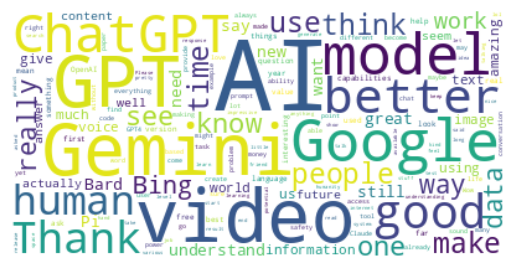

In [44]:
# Positive sentiment most common words

pos_text = " ".join(text for text in pos_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Positive sentiment with chatGPT come from comments mentioning ```bing```, ```bill```, ```model``` and ```power```.

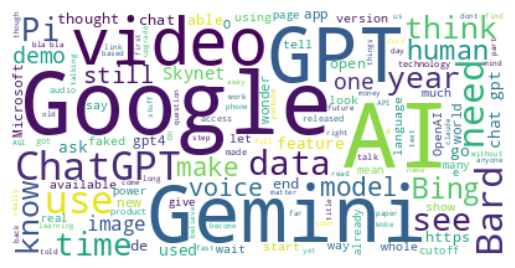

In [45]:
# Neutral sentiment most common words

neu_text = " ".join(text for text in neu_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neu_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

Neutral sentiment with chatGPT come from comments that have ```data```, ```learning```, ```cutoff``` and ```date``` in it. Surprising that ```clickbait``` is not classified as negative sentiment.

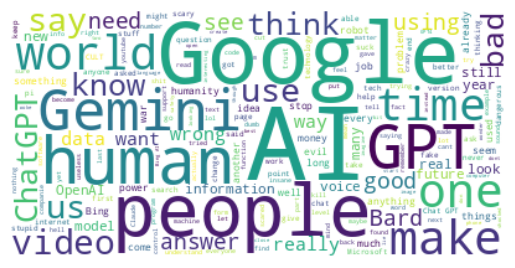

In [46]:
# Negative sentiment most common words

neg_text = " ".join(text for text in neg_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neg_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

Negative sentiment with chatGPT come from comments mentioning ```page```, ```think``` and ```Microsoft```. Interest that ```Microsoft``` as seen as negative even though its product ```bing``` was classified as positive.

After taking out some nouns and verbs from the word list, the segregation between pos, neutral and neg sentiments were clearer.

## Word clouds of unigrams is very loosely linked to sentiment. It is better to do a phrase cloud. So let's explore multi-gram (bi- and tri-) gram frequencies.

In [47]:
# Testing out rough multi-gram approach on positive sentiment df first.
test2 = pos_df.copy()

word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word', stop_words = list(stopwords))
sparse_matrix = word_vectorizer.fit_transform(test2['text'])
frequencies = sparse_matrix.sum(axis=0).T
df_test = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])
df_test['n_grams'] = df_test.index
df_test.reset_index(drop=True, inplace=True)
df_test = df_test[['n_grams', 'frequency']]
df_test.sort_values(by='frequency', ascending=False)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['2adksywb6ly', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', 'xrnokbkcue0'] not in stop_words.



,n_grams,frequency
2284,ai,411
17734,gemini,213
19322,gpt,208
18939,google,187
45956,video,185
...,...,...
17128,frankly gpt understands,1
17129,frankly imtake,1
17130,frankly imtake everything,1
17132,freak chat,1


In [48]:
#Focusing on top 20 first
sample = df_test.sort_values(by='frequency', ascending=False).head(20)
sample

,n_grams,frequency
2284,ai,411
17734,gemini,213
19322,gpt,208
18939,google,187
45956,video,185
5833,better,145
8050,chatgpt,136
18736,good,121
6221,bing,113
31215,people,111


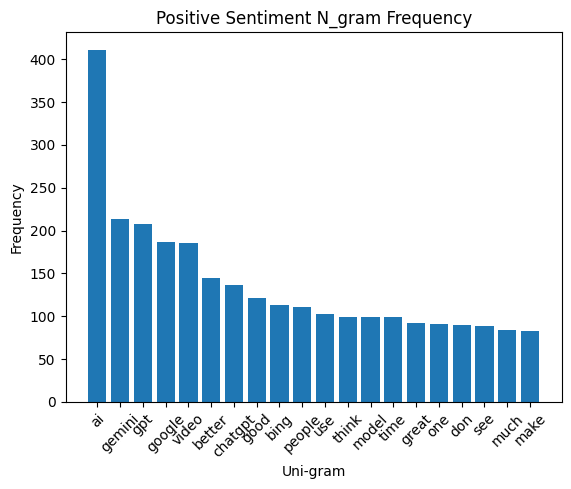

In [49]:
plt.bar(sample['n_grams'], sample['frequency'])
plt.xlabel('Uni-gram')
plt.ylabel('Frequency')
plt.title('Positive Sentiment N_gram Frequency')
plt.xticks(rotation=45)
plt.show()

In [50]:
# trying to get multiple-gram strings starting with bigram. need to take out non-helpful words such as youtube watch, amp and html tags
multi_grams = df_test.query('n_grams.str.count(" ") == [1]')
multi_grams.sort_values(by='frequency', ascending=False)[:20]

,n_grams,frequency
19054,google gemini,23
7951,chat gpt,23
8876,codebook vectors,21
6263,bing chat,21
19938,great video,18
6226,bing ai,17
1,00 00,14
21885,image recognition,14
32771,power seeking,13
28568,much better,13


This is close, but still really rough because a bunch of stop words and html tags are stuck in the word corpus creating much noise and less good signal.

# Using Susan's uni-/bi-/trigram visualizations
Reference: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [51]:
stop_words = text.ENGLISH_STOP_WORDS.union(["www", "youtube", "br", "href", "https", "39", "com", "2adksywb6ly", "re", "amp", "youtu", "eadaqil_ak0", "45", "5m45s", "quot", "xrnokbkcue0", "12", "13"]) 

In [52]:
# Unigram

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = list(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(pos_df['text'], 20)
# for word, freq in common_words:
#     print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in positive comments review after removing stop words')

In [53]:
# Bigram

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words = list(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(pos_df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 two-word phrases in positive sentiment comments after removing stop words')

chat gpt 23
google gemini 23
bing chat 21
codebook vectors 21
great video 18
sounds like 18
bing ai 17
image recognition 14
00 00 14
power seeking 13
just like 12
multimodal capabilities 12
artificial intelligence 11
16 2023 11
gemini ultra 11
safety page 10
looks like 10
open ai 10
ai model 10
feel like 9


In [54]:
# Tri-grams

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=list(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(pos_df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 three-word phrases in positive sentiment comments after removing stop words') 

accessed 16 2023 9
16 2023 gpt 6
modern science does 6
key takeaways quick 5
takeaways quick navigation 5
image recognition voice 5
science does know 5
00 00 gemini 5
bingo bingo bingo 5
14 crazy details 4
quick navigation 00 4
navigation 00 00 4
birds left tree 4
crazy details missed 3
30 prefer gpt3 3
gpt breakdown 14 3
breakdown 14 crazy 3
applications use cases 3
generate text images 3
example says gpt 3


Tri-grams helped build context, but also had redundant phrases with the same meaning (```yeah english phrases``` and ```english yeah english```) or contradictory phrases (```trained english yeah``` and ```english doesn actually```). However, discounting these may not be good because at sentence level, phrases may actually be distinct. 

# Positive, Neutral and Negative Sentiments at Uni/Bi and Trigram level

In [55]:
# Unigram

def get_top_n_words(corpus, n=None):
        vec = CountVectorizer(stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('Unigrams. From top to bottom: positive, neutral and negative sentiments')    
sent_dfs = [pos_df, neu_df, neg_df]
for i in sent_dfs:
    
    common_words = get_top_n_words(i['text'], 20)
    # for word, freq in common_words:
    #     print(word, freq)
    df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in comments review after removing stop words')

Unigrams. From top to bottom: positive, neutral and negative sentiments


In [56]:
# Bigram

def get_top_n_bigram(corpus, n=None):
        vec = CountVectorizer(ngram_range = (2,2), stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('Bigrams. From top to bottom: positive, neutral and negative sentiments')    
print (' ')
for i in sent_dfs:
    
    common_words = get_top_n_bigram(i['text'], 20)
    for word, freq in common_words:
        print(word, freq)
    df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 two-word phrases in comments review after removing stop words')

Bigrams. From top to bottom: positive, neutral and negative sentiments
 
chat gpt 23
google gemini 23
bing chat 21
codebook vectors 21
great video 18
sounds like 18
bing ai 17
image recognition 14
00 00 14
power seeking 13
just like 12
multimodal capabilities 12
artificial intelligence 11
16 2023 11
gemini ultra 11
safety page 10
looks like 10
open ai 10
ai model 10
feel like 9


chat gpt 11
bla bla 6
ai generated 5
make money 4
don know 4
woke ai 4
world economic 4
openai just 3
open ai 3
gpt told 3
bing chat 3
demo video 3
need ai 3
demo faked 3
economic forum 3
loud quiet 3
seconds long 3
extra wild 2
knowledge cutoff 2
year old 2


chat gpt 16
bing ai 9
don think 5
don want 5
bing chat 4
ai just 4
google bard 4
offensive hurtful 4
gemini google 4
usa constitution 4
american people 4
sundar pichai 4
people think 4
long time 4
trust google 4
don need 4
human beings 4
open source 4
gamma function 4
know good 3


Now it is more interesting since we see clearer distinctions between sentiment categories such as those who have a more positive sentiment towards chatGPT talk about its benefits with budgeting reports and negative sentiment surrounding concerns with ethics and military involvement. Another thing to note is that neutral sentiment phrases have no dominant phrases where distribution of phrases are equal, which is unexpected.

In [57]:
# Trigram

def get_top_n_trigram(corpus, n=None):
        vec = CountVectorizer(ngram_range = (3,3), stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('Trigrams. From top to bottom: positive, neutral and negative sentiments')    
print (' ')
for i in sent_dfs:
    
    common_words = get_top_n_trigram(i['text'], 20)
    for word, freq in common_words:
        print(word, freq)
    df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 three-word phrases in comments review after removing stop words')

Trigrams. From top to bottom: positive, neutral and negative sentiments
 
accessed 16 2023 9
16 2023 gpt 6
modern science does 6
key takeaways quick 5
takeaways quick navigation 5
image recognition voice 5
science does know 5
00 00 gemini 5
bingo bingo bingo 5
14 crazy details 4
quick navigation 00 4
navigation 00 00 4
birds left tree 4
crazy details missed 3
30 prefer gpt3 3
gpt breakdown 14 3
breakdown 14 crazy 3
applications use cases 3
generate text images 3
example says gpt 3


bla bla bla 3
world economic forum 3
channel ai generated 2
self denounced conspiracy 2
denounced conspiracy theory 2
paging john conner 2
loud quiet loud 2
quiet loud quiet 2
things make money 2
general artificial intelligence 2
120 seconds long 2
access pi heypi 2
pi heypi talk 2
new gpt start 1
gpt start learning 1
start learning beginning 1
learning beginning chat 1
beginning chat gpt 1
chat gpt gpt 1
add layers feed 1


actual human beings 3
existential threat humanity 2
model developed openai 2
long time ago 2
mission organize world 2
organize world information 2
sending plastic landfills 2
plastic landfills europe 2
fast break things 2
copying pasting code 2
version gamma function 2
single answer wrong 2
want continue conversation 2
scares publicly available 1
publicly available military 1
available military got 1
sorry confussed does 1
confussed does gpt 1
does gpt access 1
gpt access internet 1


With three-word phrases, the phrases are redundant within each sentiment, but there is more context. Something to note: a whole new topic emerges in positive sentiment about Indian language, Telugu translation. On its own it does not show up often except in context. Would be good to look into how multi-grams are formed.

# 6/15-gram/Sentence-level distribution

In [58]:
stop_words = text.ENGLISH_STOP_WORDS.union(["www", "youtube", "br", "href", "https", "39", "com", "2adksywb6ly", "re", "amp", "youtu", "eadaqil_ak0", "45", "5m45s", "quot", "xrnokbkcue0", "12", "13"]) 

In [59]:
# Seems like tri-gram still will not tell enough. So let's try out longer phrases

# Test on chatGPT data first
# get grams versus sentiment without creating pos, neu, and neg df's

chatgpt_df = df.loc[df['chatbot'] == 'ChatGPT']


pos_chatgpt_df = chatgpt_df.loc[chatgpt_df['sentiment_score'] >= 0.05]
neu_chatgpt_df = chatgpt_df.loc[(chatgpt_df['sentiment_score'] > -0.05) & (chatgpt_df['sentiment_score'] < 0.05)]
neg_chatgpt_df = chatgpt_df.loc[chatgpt_df['sentiment_score'] <= -0.05]

chatgpt_sent_dfs = [pos_chatgpt_df, neu_chatgpt_df, neg_chatgpt_df]

def get_top_n_sixgram(corpus, n=None):
        vec = CountVectorizer(ngram_range = (6,6), stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('6-grams. From top to bottom: positive, neutral and negative sentiments')    
print (' ')
for i in chatgpt_sent_dfs:
    
    common_words = get_top_n_sixgram(i['text'], 20)
    for word, freq in common_words:
        print(word, freq)
    df3 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df3.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 six-word phrases in comments review after removing stop words')

6-grams. From top to bottom: positive, neutral and negative sentiments
 
arc investigated version program running cloud 2
investigated version program running cloud computing 2
version program running cloud computing service 2
program running cloud computing service small 2
running cloud computing service small money 2
cloud computing service small money account 2
computing service small money account language 2
service small money account language model 2
small money account language model api 2
money account language model api able 2
account language model api able make 2
language model api able make money 2
model api able make money set 2
api able make money set copies 2
able make money set copies increase 2
make money set copies increase robustness 2
arc versions gpt evaluated ineffective autonomous 2
versions gpt evaluated ineffective autonomous replication 2
gpt evaluated ineffective autonomous replication task 2
evaluated ineffective autonomous replication task based 2


new gpt start learning beginning chat 1
gpt start learning beginning chat gpt 1
start learning beginning chat gpt gpt 1
add layers feed data statistical learning 1
layers feed data statistical learning learning 1
feed data statistical learning learning data 1
prod bit telling tell russia invaded 1
bit telling tell russia invaded ukraine 1
telling tell russia invaded ukraine feb 1
tell russia invaded ukraine feb 24 1
russia invaded ukraine feb 24 2022 1
invaded ukraine feb 24 2022 cutoff 1
ukraine feb 24 2022 cutoff date 1
pronounce word interesting inshting caused wild 1
word interesting inshting caused wild minutes 1
interesting inshting caused wild minutes understand 1
roped clickbait end title view instead 1
clickbait end title view instead comment 1
end title view instead comment tool 1
title view instead comment tool using 1


sorry confussed does gpt access internet 1
confussed does gpt access internet getting 1
does gpt access internet getting different 1
gpt access internet getting different answers 1
access internet getting different answers tool 1
internet getting different answers tool acctually 1
getting different answers tool acctually scraping 1
different answers tool acctually scraping internet 1
ai unpredictable programers don know good 1
unpredictable programers don know good thing 1
programers don know good thing bad 1
don know good thing bad thing 1
foreboding 404 missing returned 403 forbidden 1
just getting concerned lol unbelievably limitless 1
getting concerned lol unbelievably limitless technology 1
concerned lol unbelievably limitless technology limited 1
lol unbelievably limitless technology limited far 1
unbelievably limitless technology limited far humans 1
limitless technology limited far humans time 1
technology limited far humans time stop 1


More redundancy in topics across different phrases. Looks like what distinguishes sentiments at least at high level: positive, neutral and negative are going to be at topic level which will be explored later on.

# Sentiment by ChatBot

In [60]:
from plotly.offline import iplot

y0 = df.loc[df['chatbot'] == 'ChatGPT']['sentiment_score']
y1 = df.loc[df['chatbot'] == 'Claude']['sentiment_score']
y2 = df.loc[df['chatbot'] == 'Bard']['sentiment_score']
y3 = df.loc[df['chatbot'] == 'Bing Chat']['sentiment_score']
y4 = df.loc[df['chatbot'] == 'Pi']['sentiment_score']

trace0 = go.Box(
    y=y0,
    name = 'ChatGPT',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Claude',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Bard',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Bing Chat',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Pi',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot for Each Chat Bot"
)

fig = go.Figure(data=data,layout=layout)

iplot(fig)

In [61]:
df['chatbot'].value_counts()

chatbot
Bard         1227
ChatGPT       704
Pi            234
Bing Chat     148
Claude         87
Name: count, dtype: int64

Need to keep in mind that not all chatbots have the same number of comments. So best to normalize these number to get average sentiment per chatbot, but lose granularity in data. Given, looks like chatGPT even with high amount of user feedback, is mostly positive with some definite very negative outliers. Pi has about 30% of ChatGPT user reviews and has similar distribution except its median is lower. Bard and Bing Chat have similar sentiment. And last and most negative distribution is Claude with having a median sentiment score of 0.0 and a quantile distribution that is lower on sentiment scale relative to other chat bots. Seems to less favored, but need to scrap more data to build more confidence in this assessment.

# Distribution of Sentiment Over Time (for ChatGPT)

In [62]:
# Change published_at to date only. Aggregate the data.
chatgpt_df['published_at'] = pd.to_datetime(chatgpt_df['published_at'], format='%Y-%m-%dT%H:%M:%SZ')
chatgpt_df['published_at_date'] = chatgpt_df['published_at'].dt.date
chatgpt_df2 = chatgpt_df[['published_at_date', 'sentiment_score']]
chatgpt_df2.groupby(chatgpt_df2['published_at_date'], as_index=False).mean()

,published_at_date,sentiment_score
0,2023-03-14,0.279670
1,2023-03-15,0.265737
2,2023-03-16,0.150853
3,2023-03-17,0.173944
4,2023-03-18,0.304877
5,2023-03-19,0.189783
6,2023-03-20,0.140161
7,2023-03-21,0.014238
8,2023-03-22,0.237400
9,2023-03-23,0.498571


In [63]:
chatgpt_df['published_at_date'].min(), chatgpt_df['published_at_date'].max()

(datetime.date(2023, 3, 14), datetime.date(2023, 12, 3))

In [64]:
chatgpt_df3 = chatgpt_df2.groupby(chatgpt_df2['published_at_date'], as_index=False).mean()
chatgpt_df3

,published_at_date,sentiment_score
0,2023-03-14,0.279670
1,2023-03-15,0.265737
2,2023-03-16,0.150853
3,2023-03-17,0.173944
4,2023-03-18,0.304877
5,2023-03-19,0.189783
6,2023-03-20,0.140161
7,2023-03-21,0.014238
8,2023-03-22,0.237400
9,2023-03-23,0.498571


In [65]:
len(chatgpt_df2), len(chatgpt_df3)

(704, 53)

In [66]:
# Graph the data at non-aggregate level

fig = px.line(chatgpt_df, x="published_at", y=chatgpt_df['sentiment_score'],
              hover_data={"published_at": "|%B %d, %Y"},
              title='ChatGPT Sentiment Over Time')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [67]:
# Graph the data at aggregate level

fig = px.line(chatgpt_df3, x="published_at_date", y=chatgpt_df3['sentiment_score'],
              hover_data={"published_at_date": "|%B %d, %Y"},
              title='ChatGPT Sentiment Over Time (Date)')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [68]:
chatgpt_df.sort_values(by='published_at', ascending=True)[0:10]

,author,published_at,like_count,text,chatbot,clean_text,sentiment_score,scraped,word_count,text_len,published_at_date
596,@savlecz1187,2023-03-14 21:18:00,19,The livestream that just ended was amazing as well. Can't wait to actually get my hands on all these new features,ChatGPT,the livestream that just ended was amazing as well. can't wait to actually get my hands on all these new features,0.7096,YouTube,21,113,2023-03-14
595,@Powolny,2023-03-14 21:18:05,1,First!,ChatGPT,first!,0.0000,YouTube,1,6,2023-03-14
594,@jeffwads,2023-03-14 21:18:12,8,Fun times and scary times.,ChatGPT,fun times and scary times.,0.0258,YouTube,5,26,2023-03-14
593,@DrHanes,2023-03-14 21:18:38,2,Yeehaaa thanks for the Infos!,ChatGPT,yeehaaa thanks for the infos!,0.4926,YouTube,5,29,2023-03-14
592,@michaelharvey1701,2023-03-14 21:19:12,1,1st,ChatGPT,1st,0.0000,YouTube,1,3,2023-03-14
591,@RakibHasan-um5xi,2023-03-14 21:20:06,1,❤❤,ChatGPT,red heartred heart,0.0000,YouTube,3,18,2023-03-14
590,@andersonsystem2,2023-03-14 21:21:14,0,I been trying it out GPT4 using the Poe app and Claude plus. They are both very good models. Good video 🎉,ChatGPT,i been trying it out gpt4 using the poe app and claude plus. they are both very good models. good video tada,0.7474,YouTube,22,108,2023-03-14
589,@RainbowSixIntel,2023-03-14 21:21:37,2,"Just watched the video by open ai, great timing!",ChatGPT,"just watched the video by open ai, great timing!",0.6588,YouTube,9,48,2023-03-14
588,@MrDarthlizard32,2023-03-14 21:23:50,9,You're a true hero.,ChatGPT,you're a true hero.,0.7506,YouTube,4,19,2023-03-14
587,@DBREW,2023-03-14 21:28:05,3,Anyone have a link to the technical paper?,ChatGPT,anyone have a link to the technical paper?,0.0000,YouTube,8,42,2023-03-14


When looking at non-aggregated data, looks like there was huge variance in sentiment when YouTube video on chatGPT first came out in March 2023. After aggregating, can see at date level, the overall sentiment in March being positive with a clear dip on March 27th. Then user response tapered off with majority of sentiment being positive with some clear dips On April 4th and July 15th. This sort of data can be used when monitoring product feature releases :).

# Histogram of sentiment over time split by chatbot

In [69]:
# get date from published_at
# get pivoted data with video having its own column
# average sentiment score value aggregated by date

test = df
test['published_at'] = pd.to_datetime(test['published_at'], format='%Y-%m-%dT%H:%M:%SZ')
test['published_at_date'] = test['published_at'].dt.date
test.head(1)

,author,published_at,like_count,text,chatbot,clean_text,sentiment_score,scraped,word_count,text_len,published_at_date
0,@ozramblue117,2023-07-15 06:52:27,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,"what scares me is that if this is what’s publicly available, what have the military got and where’s it at now? sweat smile",-0.34,YouTube,23,122,2023-07-15


In [70]:
test2 = test.copy()
test2['chatbot'].value_counts().index

Index(['Bard', 'ChatGPT', 'Pi', 'Bing Chat', 'Claude'], dtype='object', name='chatbot')

In [71]:
for c in test2['chatbot'].value_counts().index:

    test2[c]=(np.select([test2['chatbot'].eq(c)],
                        [test2['sentiment_score']        
                        ])) 
test3 = test2[['published_at_date', 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat']]
test3.head(2)

,published_at_date,ChatGPT,Pi,Bard,Claude,Bing Chat
0,2023-07-15,-0.3400,0.0,0.0,0.0,0.0
1,2023-06-25,-0.0772,0.0,0.0,0.0,0.0


In [72]:
test3['published_at_date'].min(), test3['published_at_date'].max()

(datetime.date(2023, 3, 12), datetime.date(2023, 12, 15))

In [73]:
# Mean aggregate of sentiment scores by date for each chatbot column
test4 = test3.groupby(test3['published_at_date'], as_index=False).mean()
test4

,published_at_date,ChatGPT,Pi,Bard,Claude,Bing Chat
0,2023-03-12,0.000000,0.000000,0.000000,0.000000,0.306479
1,2023-03-13,0.000000,0.000000,0.000000,0.000000,0.115400
2,2023-03-14,0.277628,0.000000,0.000000,0.000000,0.006339
3,2023-03-15,0.259884,0.000000,0.000000,0.000000,0.008139
4,2023-03-16,0.146776,0.000000,0.000000,0.000000,0.006116
...,...,...,...,...,...,...
191,2023-12-11,0.000000,0.000000,0.115048,0.003706,0.000000
192,2023-12-12,0.000000,0.000000,-0.046803,0.000000,0.000000
193,2023-12-13,0.000000,0.000000,0.156883,0.000000,0.000000
194,2023-12-14,0.000000,0.000000,-0.002356,0.000000,0.018506


In [74]:
# Seeing if aggregation did indeed condense df
len(test3), len(test4)

(2400, 196)

In [75]:
fig = px.line(test4, x="published_at_date", y=test4.columns,
              hover_data={"published_at_date": "|%B %d, %Y"},
              title="Chatbots' Sentiment Over Time")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

Graph is too crowded to easily track sentiment trends per chatbot. Best to separate into 2/3 different multi-line time series graphs.

In [76]:
# Split Chatbots based on user response volume

comments_high = test4[['published_at_date', 'ChatGPT', 'Pi']]
comments_low = test4[['published_at_date', 'Bard', 'Claude', 'Bing Chat']]

fig = px.line(comments_high, x="published_at_date", y=comments_high.columns,
              hover_data={"published_at_date": "|%B %d, %Y"},
              title="Chatbots' Sentiment Over Time")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [77]:
fig = px.line(comments_low, x="published_at_date", y=comments_low.columns,
              hover_data={"published_at_date": "|%B %d, %Y"},
              title="Chatbots' Sentiment Over Time")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

Need to make sure don't really look at 0 values since filler values when sentiment average taken at date level. Also, collection of sentiment data started at different times so 0 values filled in during gaps in data collection. 

Overall, chatGPT has high sentiment whereas Pi does not have so many high/low points relative to how long (7 months vs 2 months) there have been active user comments. When comparing Bard vs Claude vs Bing Chat, we can see most activity is in the negative for Claude and about half negative sentiment for Bard. The most positive sentiment is for Bing Chat. However, needed to keep in mind that this data population is from low volume of user comments. So this is not the whole picture.

# 2D Density Jointplot of Sentiment vs. Month in 2023

In [78]:
# Let's see if there is a sentiment sweet spot for all chatbots and separately for months in 2023 (will show when competition was high amongst all chatbots to see when companies needed to seek differentiator)
df['published_at_month'] = df['published_at'].dt.month
df.head(1)

,author,published_at,like_count,text,chatbot,clean_text,sentiment_score,scraped,word_count,text_len,published_at_date,published_at_month
0,@ozramblue117,2023-07-15 06:52:27,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,"what scares me is that if this is what’s publicly available, what have the military got and where’s it at now? sweat smile",-0.34,YouTube,23,122,2023-07-15,7


In [79]:
def jointplot(chatbot_df):
    trace1 = go.Scatter(
        x=chatbot_df['sentiment_score'], y=chatbot_df['published_at_month'], mode='markers', name='points',
        marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
    )
    trace2 = go.Histogram2dContour(
        x=chatbot_df['sentiment_score'], y=chatbot_df['published_at_month'], name='density', ncontours=20,
        colorscale='Hot', reversescale=True, showscale=False
    )
    trace3 = go.Histogram(
        x=chatbot_df['sentiment_score'], name='Sentiment polarity density',
        marker=dict(color='rgb(102,0,0)'),
        yaxis='y2'
    )
    trace4 = go.Histogram(
        y=chatbot_df['published_at_month'], name='Month density', marker=dict(color='rgb(102,0,0)'),
        xaxis='x2'
    )
    data = [trace1, trace2, trace3, trace4]

    layout = go.Layout(
        showlegend=False,
        autosize=False,
        width=600,
        height=550,
        xaxis=dict(
            domain=[0, 0.85],
            showgrid=False,
            zeroline=False
        ),
        yaxis=dict(
            domain=[0, 0.85],
            showgrid=False,
            zeroline=False
        ),
        margin=dict(
            t=50
        ),
        hovermode='closest',
        bargap=0,
        xaxis2=dict(
            domain=[0.85, 1],
            showgrid=False,
            zeroline=False
        ),
        yaxis2=dict(
            domain=[0.85, 1],
            showgrid=False,
            zeroline=False
        )
    )

    fig = go.Figure(data=data, layout=layout)
    return iplot(fig)

jointplot(df)

This verified some of the above conclusions from prior time series sentiment trends. Highest volume of comments and sentiment scores (ignorning 0) come from March and most likely from ChatGPT. Best to break this visualization down into different chatbots to see where volume of comments and highest sentiment score lie since could be the case that chatGPT is overpowering the other chatbot data.

In [80]:
df['chatbot'].value_counts()

chatbot
Bard         1227
ChatGPT       704
Pi            234
Bing Chat     148
Claude         87
Name: count, dtype: int64

In [81]:
# Sentiment Score by Comment Publication Month broken down by different chatbots
chatbots = ['ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat']
chatbots_df = []
for i in chatbots:
    subset = df.loc[df['chatbot'] == i]
    chatbots_df.append(subset)
for c in chatbots_df:
    print("From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'")
    jointplot(c)

From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


* ChatGPT: most comments from March/April and heavily positive

* Pi: Most in May and June with wide spectrum of sentiment, discounting 0. Slightly more positive, but not very dominant

* Bard: highest volume of comments between August and November and mostly positive except in October

* Claude: highest volume of comments between April and August, with April having highest amount of positive sentiment

* Bing Chat: Highest volume of comments in May and June with a slight surge in August. Slightly lower on sentiment scale

# Sentiment by Likes by Chatbot

In [82]:
# Scatterplot to see where sentiment score goes as likes count increases. The desired result for each chatbot is that as each like increases so does sentiment score (positive correlation)
def scatterplot(df):
    fig = px.scatter(df, x="like_count", y="sentiment_score", title='Like counts and corresponding sentiment')
    return fig.show()
scatterplot(df)

Majority of comments spread across whole range of sentiment have no likes. Those with huge amount of likes coming from positive comments. Let's break this down by chatbot.


In [83]:
for c in chatbots_df:
    print("From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'")
    scatterplot(c)

From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


* ChatGPT: looks like overall. lot of the many liked comments are positive

* Pi: Most like counts for positive but most likes for negative sentiment

* Bard: Most likes spread across sentiment spectrum. No real bias

* Claude: Most likes spread across sentiment spectrum. No real bias. Could be sample size issue as well

* Bing Chat: High like count just came from positive sentiment. So evident that Bing Chat had favorable reaction 

# Distribution of Sentiment by Comment Length

In [84]:
def scatterplot(df):
    fig = px.scatter(df, x="text_len", y="sentiment_score", title='Comment length and corresponding sentiment')
    return fig.show()
scatterplot(df)

In [85]:
for c in chatbots_df:
    print("From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'")
    scatterplot(c)

From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


* ChatGPT: outlier long comments are positive in general

* Pi: extremely long comments, most long in whole corpus and positive

* Bard: not the longest comments, but most long are positive

* Claude: most 500 words or less and longest is 3000 character length

* Bing Chat: not that many comments, mostly less than 500, with max length comment > 1500 characters

Seems like when there is a lot to say then comment is positive; may be expressing analysis and then expressing shock or excitement for chatbot capabilities

In [86]:
# df.sort_values(by='text_len', ascending=False)[0:10]

# Domain specific words/Technical jargon associated with each sentiment

In [87]:
# What do terms in GI differ from regular English language

# Following are the terms that differentiate the comments from a general English corpus

corpus = st.CorpusFromPandas(df, category_col='chatbot', text_col='clean_text', nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['chatgpt', 'openai', 'gpt', 'skynet', 'heartred', 'deepmind', 'bing', 'youtube', 'gemini', 'smilesweat']


This looks about right except for clickbait and twitter.

# Topic Modeling

More viz may be added based on app being scraped and sort of data they provide on users' response

In [88]:
#Terms most associated with particular chatbots

def chatbot_topics(corpus, chatbot):
    term_freq_df = corpus.get_term_freq_df()
    term_freq_df['Score'] = corpus.get_scaled_f_scores(chatbot)
    return pprint(list(term_freq_df.sort_values(by='Score', ascending=False).index[:10]))

print("From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'")
for i in df['chatbot'].value_counts().index:
    chatbot_topics(corpus, i) 

From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'
['gemini',
 'gemini is',
 'multimodal',
 'demo',
 "gemini 's",
 'google',
 'bard',
 'god',
 'available',
 'product']
['2021',
 'seeking',
 'september',
 'date',
 'page',
 'arc',
 'cutoff',
 'power',
 'recognition',
 'gpt 4']
['codebook',
 'vectors',
 'codebook vectors',
 'pi',
 'pi is',
 'vector',
 'representation',
 'the codebook',
 'bots',
 'word']
['bingo',
 'bing ai',
 'bingo bingo',
 'edge',
 'bing is',
 'bing',
 'bing chat',
 'chat is',
 'the code',
 'microsoft']
['claude',
 'context window',
 'code interpreter',
 'interpreter',
 'claude is',
 'window',
 'quantum computing',
 'marketing strategy',
 'elements',
 'anthropic']


What would be nice is to elminate the nouns that are tied to the chatbot itself such as pi, bard, claude, etc. This is noise when looking for words that reveal distinguishing features between chatbots. At the same time, when manually ignorning the noise, ChatGPT list does show some key characteristcs connected to sentiment towards it: safety. Longer phrases would help as well.

It would be nice to see the split of topics by sentiment, which is what we have been after. So let's do that.

In [89]:
# Need to first get corpuses for each sentiment
# Then feed that into script to extract topics per chatbot to see what defines positive sentiment for ChatGPT and other sentiments for all chatbots

print("From top to bottom: positive, neutral and negative sentiments.")

sent_corpus = []

for s_df in sent_dfs:
    corpus = st.CorpusFromPandas(s_df, category_col='chatbot', text_col='clean_text', nlp=nlp).build()
    sent_corpus.append(corpus)
    print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

From top to bottom: positive, neutral and negative sentiments.
['chatgpt', 'openai', 'gpt', 'deepmind', 'smilesweat', 'llms', 'codebook', 'emojis', 'chatbots', 'superintelligence']
['chatgpt', 'openai', 'heartred', 'clickbait', 'joyjoyjoy', 'avanco', 'skullskullskull', 'elevenlabs', 'geminai', 'gashs']
['chatgpt', 'openai', 'pichai', 'shoukd', 'codm', 'longetivity', 'hellaswag', 'digamma', 'deepmind', 'newbing']


There are some terms that span across sentiments. If just looking at lists alone, would be difficult to see which is the dominant sentiment of ChatGPT since it is in all three sentiments at high frequency. 

To have better topics, best to eliminate common words/adjectives that are too highlevel at the stage of sentiment EDA e.g. wordcloud 

Let's try and distinguish sentiments at chatbot level.

In [90]:
# Looking at each sentiments' topics at chatbot level. 
# For pos, neu, neg corpuses, look at topics specific to chatbot and see if positive sentiment for each chatbot can be attributed to different features.
# How: loop though sent_corpus and apply topic modeling to each chatbot

print("POSITIVE SENTIMENT. From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat.")

for i in df['chatbot'].value_counts().index:             
    chatbot_topics(sent_corpus[0], i) 

POSITIVE SENTIMENT. From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat.
['gemini',
 "gemini 's",
 'multimodal',
 'gemini is',
 'google',
 'bard',
 'gemini can',
 'available',
 '*',
 'of gemini']
['seeking',
 'power',
 'arc',
 '$',
 'recognition',
 'date',
 'some of',
 '2021',
 'money',
 'september']
['pi',
 'codebook',
 'vectors',
 'codebook vectors',
 'vector',
 'the codebook',
 'representation',
 'word',
 'with pi',
 'ca n’t']
['bingo',
 'bingo bingo',
 'bing ai',
 'edge',
 'bing chat',
 'bing is',
 'microsoft',
 'bing',
 'license',
 'license check']
['claude',
 'code interpreter',
 'interpreter',
 'context window',
 'a.i .',
 'window',
 'claude is',
 'marketing strategy',
 'dollars',
 'quantum computing']


# Positive sentiment topics broken down by chatbot

Something to note is that if the overall sentiment of a chatbots' sentiment is positive then its topic list by sentiment will be similar to topic list at general level. This is the case for ChatGPT. Safety is interestingly classified under positive when the news speaks of ChatGPT's safety as a concern. This is why having phrases would be best when classifying sentiment.

* The same in list similarity is for Pi chatbot
* Bard list does not say anything about the chatbot itself. just a bunch of repetition of bard the name
* Claude list has ordering of words different which is helpful. Another thing that shows up that is beneficial is the phrase ```context window```
* Bing Chat shows more informative words such as ```search``` and ```intelligence```. This may be due to a smaller corpus givent hat corpuses have not been cleaned of noisy terms.

In [91]:
print("NEUTRAL SENTIMENT. From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat.")

for i in df['chatbot'].value_counts().index:
    chatbot_topics(sent_corpus[1], i) 

NEUTRAL SENTIMENT. From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat.
['gemini',
 'bla',
 'google',
 'demo',
 'faked',
 'bard',
 'skynet',
 'gemini is',
 'the world',
 'all']
['feature',
 'cutoff',
 '2021',
 'image',
 'images',
 'the model',
 'learning',
 'got',
 'told',
 'able to']
['pi',
 'pi is',
 'name you',
 'i name',
 'voice',
 'name',
 'based',
 'to do',
 'chatbot',
 'commercial for']
['seconds long',
 '120',
 'seconds',
 'bing ai',
 '120 seconds',
 'starts',
 '’m on',
 'says',
 'i make',
 'blow']
['claude',
 'is far',
 '% as',
 'use claude',
 'plap',
 'subbed',
 'need a',
 'is still',
 'far',
 'quantum']


# Neutral sentiment topics broken down by chatbot

* ChatGPT: cutoff
* Pi: name
* Bard: ai generated
* Claude: far (but in what?)
* Bing Chat: garbage, knowledge cards

Despite this coming from netural corpus, has so far the most helpful words related to features to link to sentiment.

In [92]:
print("NEGATIVE SENTIMENT. From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat.")

for i in df['chatbot'].value_counts().index:
    chatbot_topics(sent_corpus[2], i) 

NEGATIVE SENTIMENT. From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat.
['gemini',
 'google',
 'bard',
 'our',
 'will be',
 'them',
 'evil',
 'cult',
 'look',
 'god']
['page',
 '404',
 'safety',
 'internet',
 'model',
 'power',
 'scared',
 'report',
 '2021',
 '4']
['pi',
 'actual human',
 'beings',
 'human beings',
 'mean',
 'talk to',
 'beings are',
 'shoot',
 'advice',
 'actual']
['the code',
 'gamma',
 'function',
 'bing ai',
 'gamma function',
 'code',
 'me for',
 'bing',
 'to say',
 'when it']
['claude',
 'right and',
 'perception',
 'eventually',
 'and wrong',
 'ethics',
 'mental illness',
 'wrong it',
 'more accurate',
 'much better']


### Negative sentiment topics broken down by chatbot

ChatGPT: model, power
Pi: beings, actual human
Bard: images
Claude: quantum
Bing Chat: request

Looks like with negative sentiment as well, there are chatbot features that are linked to a user sentiment. Yay! Would be great to see in visualization positive, neutral and negative sentiment words between multiple chatbots.

In [93]:
#Scattertext to visualize words/phrases by sentiment

# First try looking at whole corpus - all chatbots to see what are favorable qualities and not
# Then look at specific chatbots to see what is favorable and not
# look at how that compares to above

# Another attempt to understand the data

In [94]:
reviews_df = pd.read_csv('https://github.com/JasonKessler/ICLR18ReviewVis/raw/master/iclr2018_reviews.csv.bz2')
reviews_df['parse'] = reviews_df['review'].apply(st.whitespace_nlp_with_sentences)
full_corpus = (st.CorpusFromParsedDocuments(reviews_df,
                                            category_col='category',
                                            parsed_col='parse',
                                            #feats_from_spacy_doc=st.PhraseMachinePhrases()
                                            ).build())

term_ranker = st.OncePerDocFrequencyRanker
corpus = (full_corpus
          .keep_only_these_categories(['Accept, Positive', 'Accept, Negative',
                                       'Reject, Positive', 'Reject, Negative'],
                                      False)
          .get_unigram_corpus()
          .select(st.ClassPercentageCompactor(term_count=5)))


priors = (st.PriorFactory(full_corpus, starting_count=0.01)
          .use_all_categories()
          .get_priors())

In [95]:
four_square = st.FourSquare(
	corpus,
	category_a_list=['Accept, Positive'],
	not_category_a_list=['Reject, Negative'],
	category_b_list=['Accept, Negative'],
	not_category_b_list=['Reject, Positive'],
	term_ranker=term_ranker,
	scorer=st.LogOddsRatioInformativeDirichletPrior(priors, 500, 'word'),
	labels={'a': 'Positive Reviews of Accepted Papers',
	        'b': 'Negative Reviews of Accepted Papers',
	        'not_a_and_not_b': 'Rejections',
	        'a_and_b': 'Acceptances',
	        'a_and_not_b': 'Positive Reviews',
	        'b_and_not_a': 'Negative Reviews',
	        'not_a': 'Negative Reviews of Rejected Papers',
	        'not_b': 'Positive Reviews of Rejected Papers',
	        }
)

html = st.produce_four_square_explorer(four_square=four_square,
                                       x_label='Pos-Neg',
                                       y_label='Accept-Reject',
                                       num_terms_semiotic_square=5,
                                       minimum_term_frequency=0,
                                       pmi_threshold_coefficient=0,
                                       term_ranker=term_ranker,
                                       metadata=(corpus._df['category'] + ': '
                                                 + corpus._df.rating + ', '
                                                 + corpus._df['title']))

In [96]:
file_name2 = 'pub_acc.html'
with open(file_name2, 'w') as outf: outf.write(html)
rel_report_path = os.path.relpath(file_name2)   
display(IFrame(file_name2, width=2000, height=700))

In [97]:
reviews_df.head(2)

,title,authors,decision_raw,forum,confidence,rating,review,decision,rating_bin,category,metadata,parse
0,Improving Discriminator-Generator Balance in Generative Adversarial Networks,['Simen Selseng and Björn Gambäck'],Reject,SyBPtQfAZ,4: The reviewer is confident but not absolutely certain that the evaluation is correct,3: Clear rejection,"The paper proposes a variety of modifications to improve GAN training and evaluates them using a variant of the Generative Adversarial Metric.\n\nThe first proposed approach, Static Reusable Noise, proposes sampling a fixed set of latent noise vectors instead of producing them via online sampling. It is motivated by the observation that the generator encounters different noise samples at each iteration of training while for real data the discriminator sees only a fixed number of samples. This does not seem to be a particularly convincing argument. One could argue likewise that this makes the discriminator's job easier as it only has to track the finite amount of samples the generator can produce instead of the full distribution. Experimentally it does not appear to consistently help.\n\nThe second approach, Image based noise generation, replaces noise sampled from a simple distribution such as gaussian or uniform noise with a downsampled and grayscaled version of training images. This does not seem particularly well motivated. Usually the latent space of a generative model is assumed to represent high level disentangled/compositional factors of the data - not a low-level course grained representation of the image. In the case of conditional GANs, this is explicitly the case. The paper's experimental section suggests this failed to improve upon a baseline in all cases. This approach has an additional drawback of no longer having a tractable process to draw new samples from the model as it is dependent on samples from the data distribution.\n\nThe third variant, audition based noise selection (ABNS), proposes selecting a subset of generator samples in a given batch to train on. Two variants are considered, selecting only the best performing (according to the generator) or a mix of the best, worst, and random. This approach most directly addresses the proposed problem of generator discriminator imbalance and seems to be the most well-motivated. With the experimental methodology of the paper it also appears to be the one that potentially helps the most.\n\nThe proposed changes are motivated by the intuition that they better balance the difficulty of the tasks of the generator and discriminator. To potentially validate this, the authors could check whether the training loss terms of the generator and discriminator are better balanced on average. Could the authors comment on whether they observed this to be the case?\n\nFor comparisons, the number of epochs of training appears to be chosen arbitrarily per experiment. Throughout the paper comparisons are reported at epoch 8, 14, 16, 18, 20, 22, 25, 40, and 50. The graphs visualizing the reported metric over training show large oscillations between epochs. This makes it difficult to draw strong conclusions from the results. The authors could improve the strength of their results by comparing/evaluating with a more widely used metric, such as the Inception Score from (Salimans et al. 2016) which has seen wide adoption yet is missing from the evaluation metrics discussed in section 4.3.\n\nOverall, the paper presents a variety of proposed changes to GAN training. Several of the proposed approaches seem ad-hoc and not particularly well motivated. One of the proposed approaches, ABNS, is potentially promising but the experimental methodology appears to have significant issues which makes evaluating and drawing strong conclusions from the results difficult. The reader is left with an unclear picture of the value of the proposed approaches.\n",Reject,Negative,"Reject, Negative",Improving Discriminator-Generator Balance in Generative Adversarial Networks<b

In [98]:
reviews_df['category'].value_counts()

category
Reject, Negative      737
Reject, Neutral       649
Accept, Positive      572
Accept, Neutral       386
Workshop, Neutral     167
Reject, Positive      130
Workshop, Negative     65
Accept, Negative       57
Workshop, Positive     43
Name: count, dtype: int64

In [99]:
# **This graph discounts neutral sentiment**
# need to get sentiment as "pos"/"neg"
# need to get ChatGPT and Claude rows only
# create new column with combination of sentiment and chatbot
# create column with parsed text (unigram/bigram?)

df.head(5)

,author,published_at,like_count,text,chatbot,clean_text,sentiment_score,scraped,word_count,text_len,published_at_date,published_at_month
0,@ozramblue117,2023-07-15 06:52:27,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,"what scares me is that if this is what’s publicly available, what have the military got and where’s it at now? sweat smile",-0.3400,YouTube,23,122,2023-07-15,7
1,@lenkaa.9955,2023-06-25 09:33:43,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT,"i am sorry i am confussed, does gpt has access to internet or not. i am getting different answers. which tool is acctually scraping internet?",-0.0772,YouTube,25,141,2023-06-25,6
2,@decoyuser1506,2023-05-18 13:06:00,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT,"5:45 iam a telugu guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",0.4003,YouTube,38,202,2023-05-18,5
3,@ABRARAHMAD-ul8gu,2023-05-16 17:44:42,0,Please provide a Link to download gtp 4,ChatGPT,please provide a link to download gtp 4,0.3182,YouTube,8,39,2023-05-16,5
4,@RosscoAW,2023-05-09 23:07:20,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT,"lmao ofc gpt-4 is going to be good at generating disinfo; the alignment research focuses on making ai harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed 

In [100]:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

def sentiment(df):
    
    if df['sentiment_score'] >= 0.05:
        return 'Positive'
    elif df['sentiment_score'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
df['sentiment'] = df.apply(sentiment, axis = 1)
df.head()

,author,published_at,like_count,text,chatbot,clean_text,sentiment_score,scraped,word_count,text_len,published_at_date,published_at_month,sentiment
0,@ozramblue117,2023-07-15 06:52:27,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,"what scares me is that if this is what’s publicly available, what have the military got and where’s it at now? sweat smile",-0.3400,YouTube,23,122,2023-07-15,7,Negative
1,@lenkaa.9955,2023-06-25 09:33:43,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT,"i am sorry i am confussed, does gpt has access to internet or not. i am getting different answers. which tool is acctually scraping internet?",-0.0772,YouTube,25,141,2023-06-25,6,Negative
2,@decoyuser1506,2023-05-18 13:06:00,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT,"5:45 iam a telugu guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",0.4003,YouTube,38,202,2023-05-18,5,Positive
3,@ABRARAHMAD-ul8gu,2023-05-16 17:44:42,0,Please provide a Link to download gtp 4,ChatGPT,please provide a link to download gtp 4,0.3182,YouTube,8,39,2023-05-16,5,Positive
4,@RosscoAW,2023-05-09 23:07:20,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT,"lmao ofc gpt-4 is going to be good at generating disinfo; the alignment research focuses on making ai harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats 

In [101]:
df['sentiment'].value_counts()

sentiment
Positive    1207
Neutral      628
Negative     565
Name: count, dtype: int64

In [102]:
# Grab only chatgpt and claude rows
chat_claude_df = df.loc[df['chatbot'].isin(['ChatGPT', 'Claude'])]
chat_claude_df.head()

,author,published_at,like_count,text,chatbot,clean_text,sentiment_score,scraped,word_count,text_len,published_at_date,published_at_month,sentiment
0,@ozramblue117,2023-07-15 06:52:27,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,"what scares me is that if this is what’s publicly available, what have the military got and where’s it at now? sweat smile",-0.3400,YouTube,23,122,2023-07-15,7,Negative
1,@lenkaa.9955,2023-06-25 09:33:43,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT,"i am sorry i am confussed, does gpt has access to internet or not. i am getting different answers. which tool is acctually scraping internet?",-0.0772,YouTube,25,141,2023-06-25,6,Negative
2,@decoyuser1506,2023-05-18 13:06:00,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT,"5:45 iam a telugu guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",0.4003,YouTube,38,202,2023-05-18,5,Positive
3,@ABRARAHMAD-ul8gu,2023-05-16 17:44:42,0,Please provide a Link to download gtp 4,ChatGPT,please provide a link to download gtp 4,0.3182,YouTube,8,39,2023-05-16,5,Positive
4,@RosscoAW,2023-05-09 23:07:20,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT,"lmao ofc gpt-4 is going to be good at generating disinfo; the alignment research focuses on making ai harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats 

In [103]:
# define category column
chat_claude_df['category'] = chat_claude_df['chatbot'] + ', ' + chat_claude_df['sentiment']
chat_claude_df['category'].value_counts()

category
ChatGPT, Positive    404
ChatGPT, Neutral     170
ChatGPT, Negative    130
Claude, Positive      45
Claude, Negative      21
Claude, Neutral       21
Name: count, dtype: int64

In [104]:
chat_claude_df['parse'] = chat_claude_df['clean_text'].apply(st.whitespace_nlp_with_sentences)
full_corpus = (st.CorpusFromParsedDocuments(chat_claude_df,
                                            category_col='category',
                                            parsed_col='parse',
                                            ).build())

term_ranker = st.OncePerDocFrequencyRanker
corpus = (full_corpus
          .keep_only_these_categories(['ChatGPT, Positive', 'ChatGPT, Negative',
                                       'Claude, Positive', 'Claude, Negative'],
                                      False)
          .get_unigram_corpus()
          .select(st.ClassPercentageCompactor(term_count=5)))


priors = (st.PriorFactory(full_corpus, starting_count=0.01)
          .use_all_categories()
          .get_priors())

four_square = st.FourSquare(
    corpus,
    category_a_list=['ChatGPT, Positive'],
    not_category_a_list=['Claude, Negative'],
    category_b_list=['ChatGPT, Negative'],
    not_category_b_list=['Claude, Positive'],
    term_ranker=term_ranker,
    scorer=st.LogOddsRatioInformativeDirichletPrior(priors, 500, 'word'),
    labels={'a': 'Positive Comments of ChatGPT',
            'b': 'Negative Comments of ChatGPT',
            'not_a_and_not_b': 'Claude',
            'a_and_b': 'ChatGPT',
            'a_and_not_b': 'Positive Comments',
            'b_and_not_a': 'Negative Comments',
            'not_a': 'Negative Comments of Claude',
            'not_b': 'Positive Comments of Claude',
            }
)

html = st.produce_four_square_explorer(four_square=four_square,
                                       x_label='Positive-Negative',
                                       y_label='ChatGPT-Claude',
                                       num_terms_semiotic_square=5,
                                       minimum_term_frequency=0,
                                       pmi_threshold_coefficient=0,
                                       term_ranker=term_ranker)

file_name3 = 'chatgpt_claude_sent.html'
with open(file_name3, 'w') as outf: outf.write(html)
rel_report_path = os.path.relpath(file_name3)   
display(IFrame(file_name3, width=2000, height=700))

Excellent! The visualization with ChatGPT vs Claude with grams and sentiment plotted. Parallel to previous visualizations that most comments are positive coming from ChatGPT. Next iteration is obviously to get rid of articles, nouns that are noise and to get more data. :)

## Looking at topics via LSA. 
This will help look at topics at tri-gram level which we have been wanting to explore.

In [105]:
reindexed_data = df['clean_text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [106]:
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [107]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [108]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [109]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

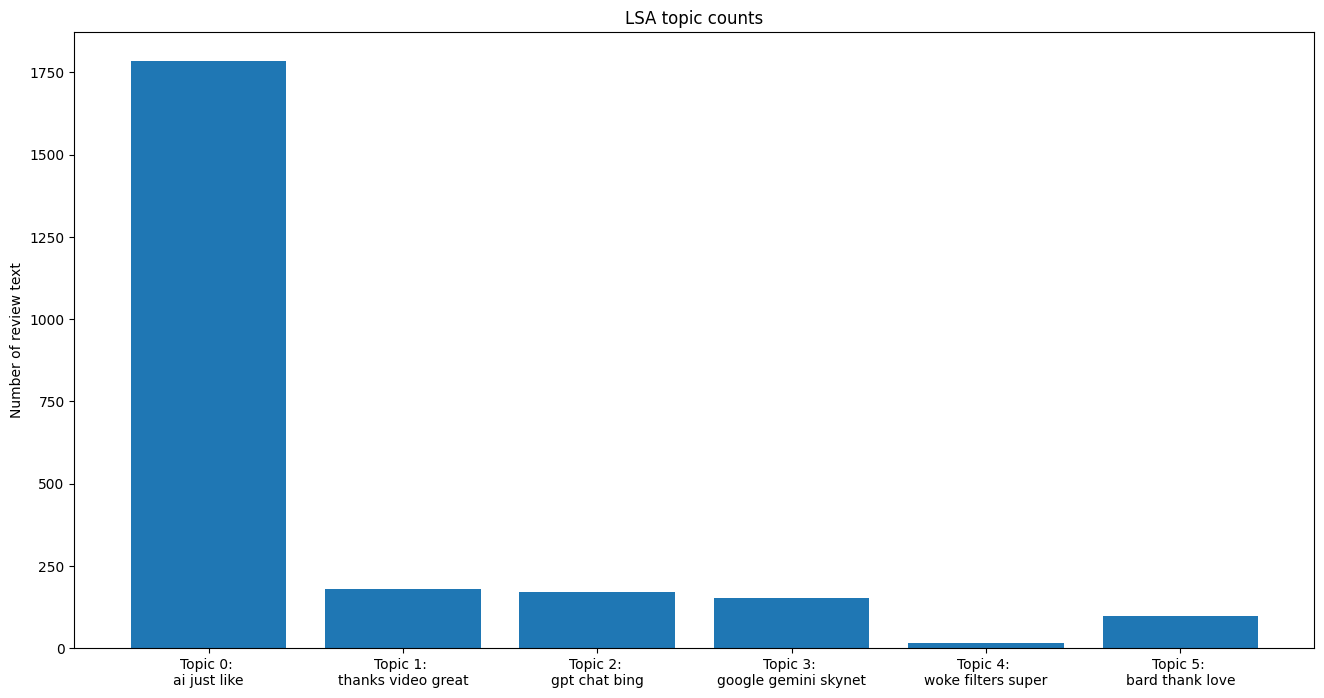

In [110]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

The topic with highest amount of comments makes sense since this in general covers all chatbots and the YouTube video topics. In order to get better differentiation between topics, could scrape more app's such as Reddit and LinkedIn. If there is not much improvement there, then it is clear that topic modeling algorithms have its limitations.

In [111]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.002s...
[t-SNE] Computed neighbors for 2400 samples in 0.138s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 0.007310
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.204109
[t-SNE] KL divergence after 2000 iterations: 0.829133


In [112]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        reviews_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                reviews_in_that_topic.append(two_dim_vectors[i])    
        
        reviews_in_that_topic = np.vstack(reviews_in_that_topic)
        mean_review_in_that_topic = np.mean(reviews_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_review_in_that_topic)
    return mean_topic_vectors

In [113]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [114]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), width=700, height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

With any clustering, you want to see clear distinct groups and observe the nearness of neighboring groups.

This is a cool twist on previous bar chart showing relationship of topics to one another. Size of clusters make sense as well as how close each topic is to one another. Really awesome! Would be nice to see sentiment represented here with clusters colored with respective sentiment score. Would have given that extra touch. For next iteration, that would be possible! For now, let's make our concluding marks.

In [115]:
# Wait. Scattertext: Interactive Viz to see different tri-grams frequency between chatbots (2 at once: ChatGPT vs Claude)

# Scattertext again, but used differently...?
convention_df = st.SampleCorpora.ConventionData2012.get_data()  
convention_df.head(2)

party  \
0  democrat   
1  democrat   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [116]:
list(convention_df)

['party', 'text', 'speaker']

In [117]:
# import spacy
# from scattertext import SampleCorpora, PhraseMachinePhrases, dense_rank, RankDifference, AssociationCompactor, produce_scattertext_explorer
# from scattertext.CorpusFromPandas import CorpusFromPandas

# corpus = (CorpusFromPandas(chat_claude_df,
#                            category_col='chatbot',
#                            text_col='clean_text',
#                            feats_from_spacy_doc=PhraseMachinePhrases(),
#                            nlp=spacy.load("en_core_web_sm", exclude=["parser", "tagger"]))
#           .build().compact(AssociationCompactor(4000)))

# html = produce_scattertext_explorer(corpus,
#                                     category='ChatGPT',
#                                     category_name='ChatGPT',
#                                     not_category_name='Claude',
#                                     minimum_term_frequency=0,
#                                     pmi_threshold_coefficient=0,
#                                     transform=dense_rank,
#                                     term_scorer=RankDifference(),
#                                     width_in_pixels=1000)

# file_name4 = 'chatgpt_claude_grams_freq.html'
# with open(file_name4, 'w') as outf: outf.write(html)
# rel_report_path = os.path.relpath(file_name4)   
# display(IFrame(file_name4, width=2000, height=700))

_____

In [118]:
# nlp = spacy.load("en_core_web_sm")
# nlp.add_pipe("textrank")

# chat_claude_df['parse'] =  chat_claude_df['clean_text'].apply(nlp)


# corpus = st.CorpusFromParsedDocuments(
#     chat_claude_df,
#     category_col= 'chatbot',
#     parsed_col='parse',
#     feats_from_spacy_doc=st.PyTextRankPhrases()
# ).build(
# ).compact(
#     AssociationCompactor(2000, use_non_text_features=True)
# )

# Conclusion on Online Sentiment of Chatbots Big and Not-So-Big Players in 2023